## Success Sage: Student Performance Prediction & Analysis Tool

#### Machine Learning Project Lifecycle

- **Understanding the Problem Statement**: Define the scope and objectives of the project to ensure clarity on what needs to be achieved.
- **Data Collection**: Gather data from relevant sources that will be used for model training and analysis.
- **Data Integrity Checks**: Conduct initial checks to verify the quality and integrity of the data collected.
- **Exploratory Data Analysis (EDA)**: Analyze the data to uncover trends, patterns, and anomalies to inform further data handling and modeling strategies.
- **Data Pre-Processing**: Cleanse and prepare the data by handling missing values, normalizing data, encoding categorical variables, etc., to make it suitable for modeling.
- **Model Training**: Develop and train machine learning models using the processed data.
- **Model Selection**: Evaluate and compare the performance of different models to select the most effective one for deployment.

### 1) Project Objective
The goal of this project is to analyze the impact of various factors on students' academic performance. Specifically, we aim to explore how test scores are influenced by variables such as gender, ethnicity, parental education level, lunch provision, and test preparation courses.

### 2) Data Acquisition
- **Source of Dataset**: [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- **Dataset Overview**: The dataset comprises 1,000 entries, each with 8 attributes that detail individual student performances and demographic information. This structured data will facilitate a comprehensive analysis of trends and patterns in educational achievement.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [103]:
!pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata (20 kB)
  Using cached pydantic-2.7.2-py3-none-any.whl.metadata (108 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached multimethod-1.11.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached typeguard-4.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_extensions-4.12.1-py3-none-any.whl.metadata (3.0 kB)
Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl (359 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached dacite-1.8.1-py3-none-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/students.csv')

#### Show Top 5 Records

In [7]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#### Shape of the dataset

In [8]:
df.shape

(1000, 8)

### 2.2 Dataset information

- **Gender**: Indicates the sex of the students (Male/Female).
- **Race/Ethnicity**: Categorizes students into different ethnic groups (Group A, B, C, D, E).
- **Parental Level of Education**: Represents the highest level of education attained by the student's parents (Bachelor's Degree, Some College, Master's Degree, Associate's Degree, High School).
- **Lunch**: Describes the type of lunch received before the test (Standard or Free/Reduced).
- **Test Preparation Course**: Status of completion of a test preparation course (Complete/Not Complete).
- **Math Score**: Numeric score achieved in the math test.
- **Reading Score**: Numeric score achieved in the reading test.
- **Writing Score**: Numeric score achieved in the writing test.

### 3. Data Integrity Checks

- **Check for Missing Values**: Identify any missing or null entries in the dataset.
- **Check for Duplicates**: Detect and address duplicate records to ensure data uniqueness.
- **Verify Data Types**: Ensure that each column's data type is appropriate for its data (e.g., numerical, categorical).
- **Unique Values Count**: Determine the number of unique entries in each column to understand data diversity.
- **Descriptive Statistics**: Compute summary statistics such as mean, median, mode, standard deviation, etc., to get insights into the data distribution.
- **Categorical Data Analysis**: Examine the categories present in each categorical column to understand the range and type of categories included.



### 3.1 Check Missing values

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [14]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

#### Insights from Descriptive Statistics

- **Mean Scores**: The mean scores for math, reading, and writing are closely aligned, ranging between 66 and 68.05, indicating a general consistency in performance across these subjects.
- **Standard Deviations**: The standard deviations for these subjects are also similar, lying between 14.6 and 15.19, which suggests a comparable spread of scores across students.
- **Minimum Scores Variation**: There is notable variation in the minimum scores:
  - **Math**: The lowest recorded score is 0, indicating potential outliers or issues with the data collection for this subject.
  - **Writing**: The minimum score is significantly higher at 10.
  - **Reading**: The minimum score is the highest at 17, suggesting a baseline level of competency or less variability in performance compared to the other subjects.

### 3.7 Exploring Data

In [15]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [20]:
def print_unique_categories(df, column_name):
    print(f"Categories in '{column_name}' variable:", end=" ")
    print(df[column_name].unique())

# Usage of the function to print unique categories
print_unique_categories(df, 'gender')
print_unique_categories(df, 'race/ethnicity')
print_unique_categories(df, 'parental level of education')
print_unique_categories(df, 'lunch')
print_unique_categories(df, 'test preparation course')

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [22]:
# Identifying numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']  # 'O' represents object type which is typically used for strings in pandas
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Printing the identified columns
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Enhancements: Adding "Total Score" and "Average Score" Columns

- **Total Score**: A new column will be created to sum the scores from math, reading, and writing tests for each student. This will provide a cumulative score that reflects the overall academic performance.
- **Average Score**: Alongside the total score, an average score column will be calculated by dividing the total score by the number of subjects (3). This will help in assessing the general performance level of students across all tested subjects.


In [24]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [25]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [26]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights from Subject Performance Analysis

- **Math Performance**: The analysis indicates that students have the lowest scores in math, suggesting it as the subject where students struggle the most.
- **Reading Performance**: Contrarily, students show their best performance in the reading section, highlighting it as a strength in their academic repertoire.


### 4. Exploring Data Through Visualization

#### 4.1 Visualizing the Distribution of Average Scores
To gain deeper insights into student performance and identify underlying patterns, we will visualize the distribution of average scores using the following methods:

- **Histogram**: This will provide a clear view of the frequency distribution of average scores among students, helping to identify common performance levels and outliers.
- **Kernel Density Estimate (KDE)**: The KDE will be used to estimate the probability density function of the average scores. This smooth curve will help in understanding the distribution shape and the areas where data points concentrate the most.


#### 4.1.1 Histogram & KDE

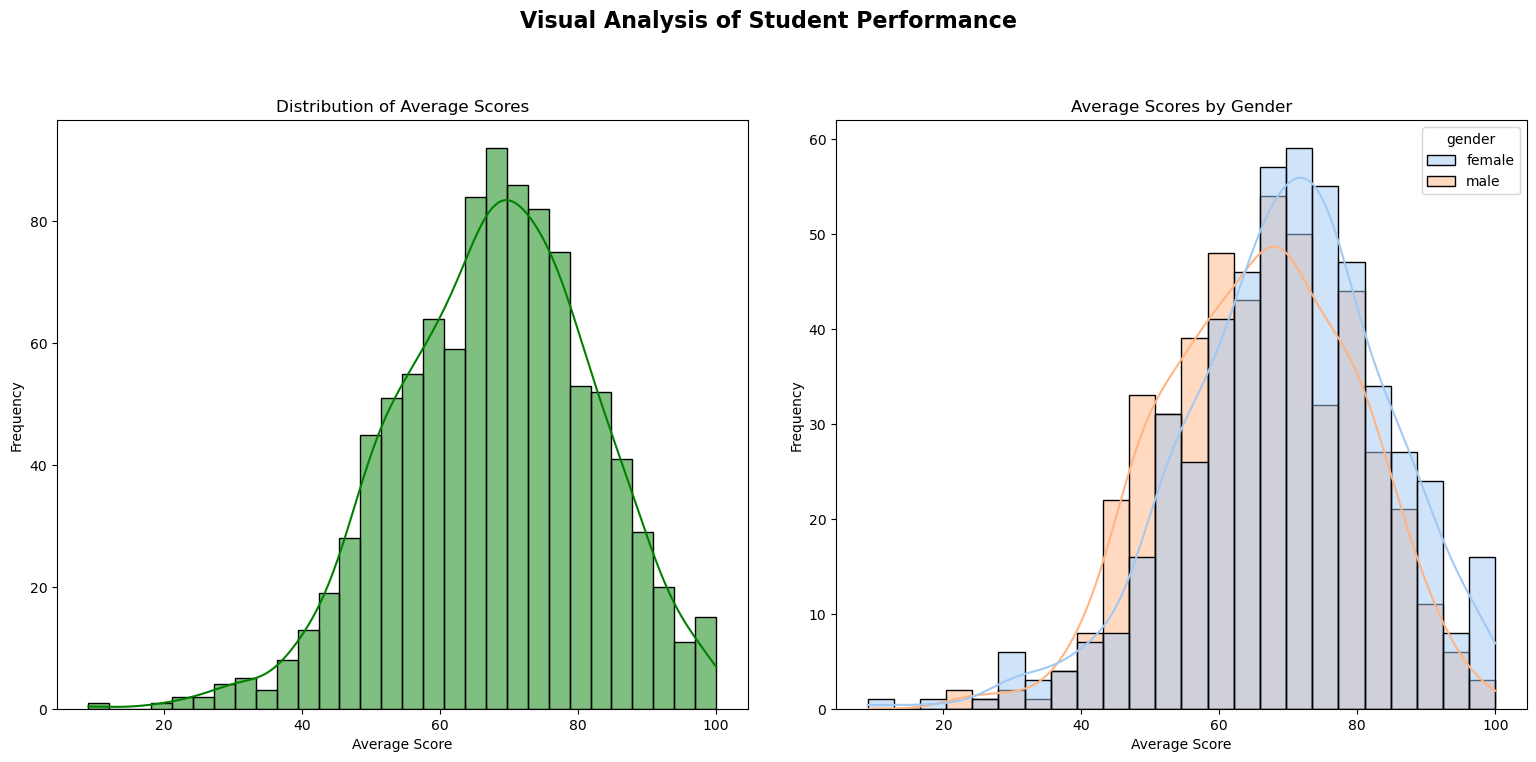

In [34]:
# Setting up the figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Histogram with Kernel Density Estimate (KDE)
plt.subplot(121)  # First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='green')
plt.title('Distribution of Average Scores')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Histogram by Gender with KDE
plt.subplot(122)  # Second subplot
sns.histplot(data=df, x='average', kde=True, hue='gender', palette='pastel')
plt.title('Average Scores by Gender')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Adding an overall title and adjusting layout
plt.suptitle('Visual Analysis of Student Performance', fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0)  # Adjust spacing to prevent overlap

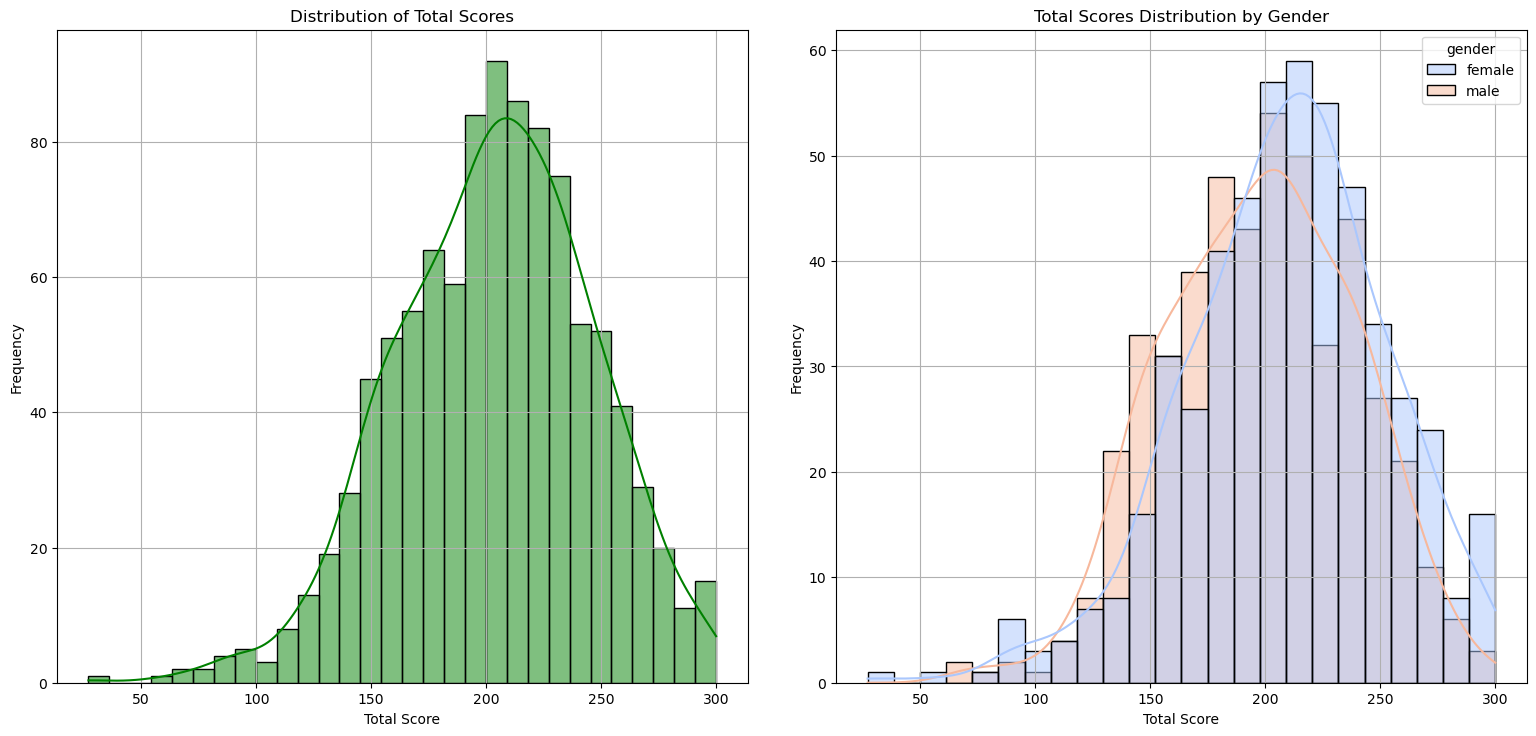

In [35]:
# Setting up the figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Histogram with Kernel Density Estimate (KDE) for Total Score
plt.subplot(121)  # First subplot
sns.histplot(data=df, x='total score', bins=30, kde=True, color='green')
plt.title('Distribution of Total Scores')  # Adding a title
plt.xlabel('Total Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram by Gender with KDE for Total Score
plt.subplot(122)  # Second subplot
palette = sns.color_palette("coolwarm", 2)  # Defining a color palette
sns.histplot(data=df, x='total score', kde=True, hue='gender', palette=palette)
plt.title('Total Scores Distribution by Gender')  # Adding a title
plt.xlabel('Total Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Adjust layout and display the plot
plt.tight_layout(pad=3.0)  # Adjust spacing to prevent overlap

##### Insights from Gender-Based Performance Analysis

- **Gender Performance Trends**: The data reveals that female students generally outperform male students across the subjects analyzed. This trend underscores potential differences in academic strengths or educational engagement between genders.


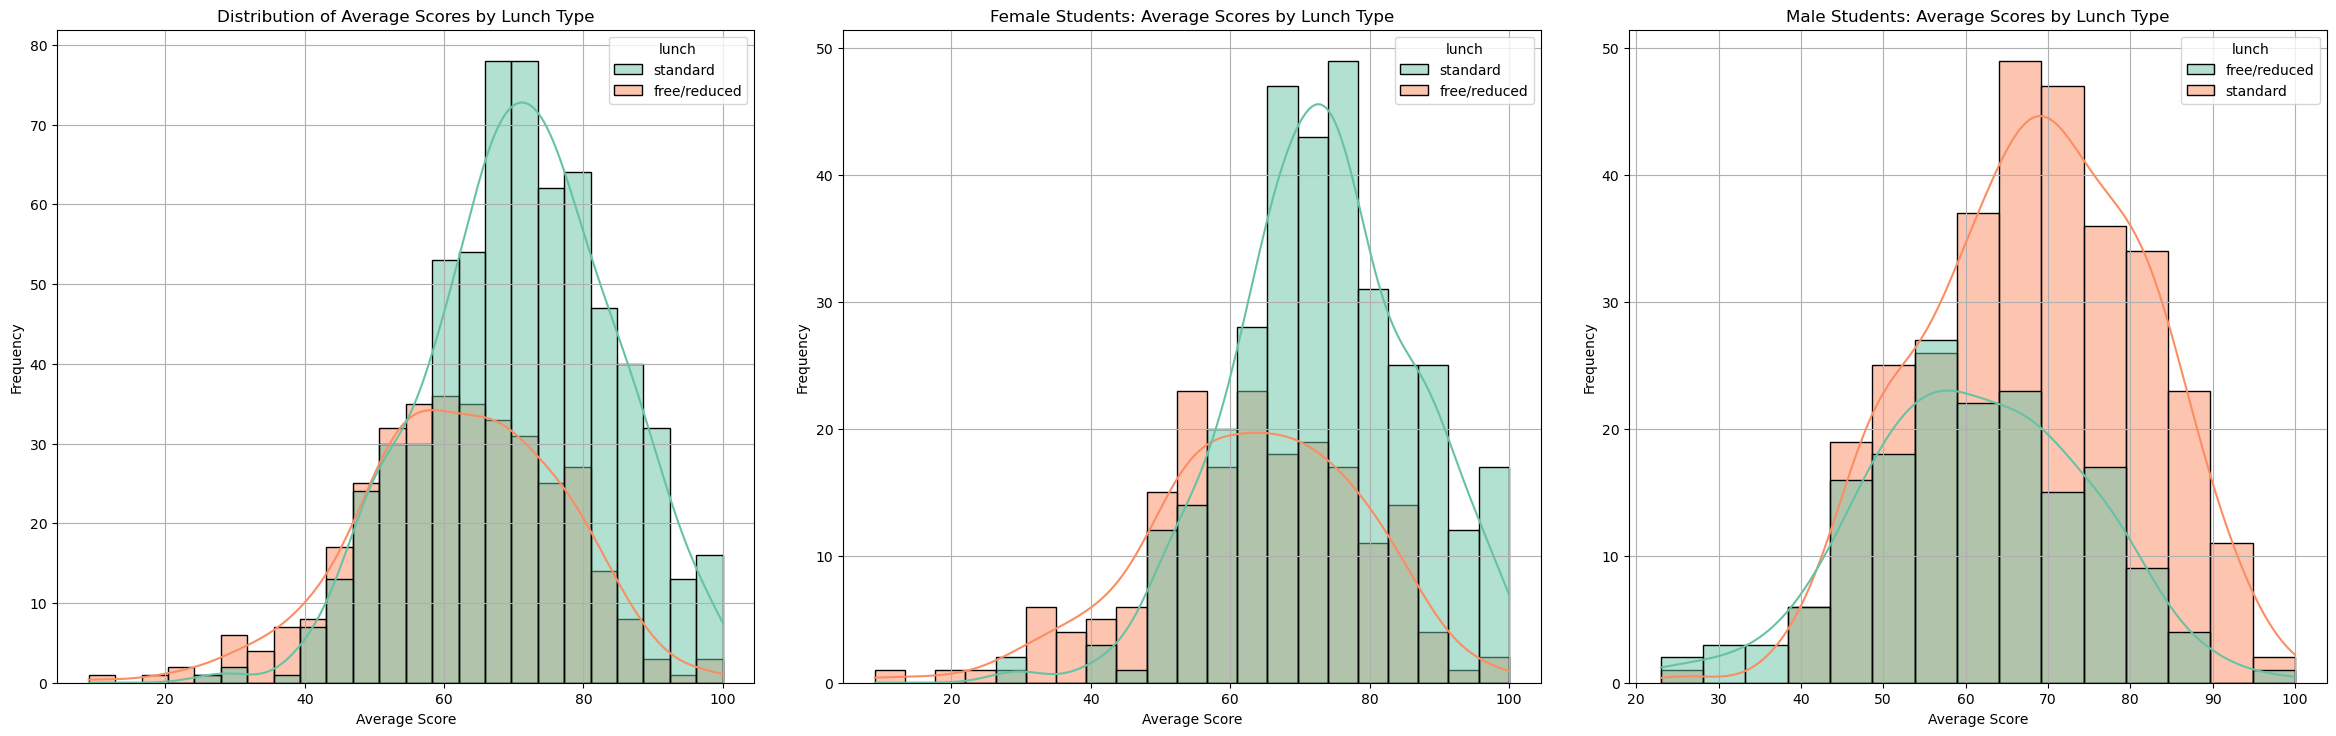

In [38]:
# Setting up the figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Histogram of Average Scores for All Students with KDE by Lunch Type
plt.subplot(131)  # First subplot
sns.histplot(data=df, x='average', kde=True, hue='lunch', palette='Set2')
plt.title('Distribution of Average Scores by Lunch Type')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram of Average Scores for Female Students with KDE by Lunch Type
plt.subplot(132)  # Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', palette='Set2')
plt.title('Female Students: Average Scores by Lunch Type')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram of Average Scores for Male Students with KDE by Lunch Type
plt.subplot(133)  # Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', palette='Set2')
plt.title('Male Students: Average Scores by Lunch Type')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Adjust layout and display the plot
plt.tight_layout(pad=3.0)  # Adjust spacing to prevent overlap

##### Insights from Lunch Type and Academic Performance Analysis

- **Impact of Lunch Type on Scores**: The analysis indicates that students who receive a standard lunch consistently perform better in exams compared to those receiving a free or reduced lunch. This suggests that the quality or reliability of lunch may significantly influence academic outcomes.
- **Gender and Lunch Type**: The positive effect of standard lunch on exam performance is evident across both genders. Male and female students with access to standard lunch options show higher average scores than their peers with free or reduced lunch, highlighting the universal benefit of better nutrition or meal consistency.


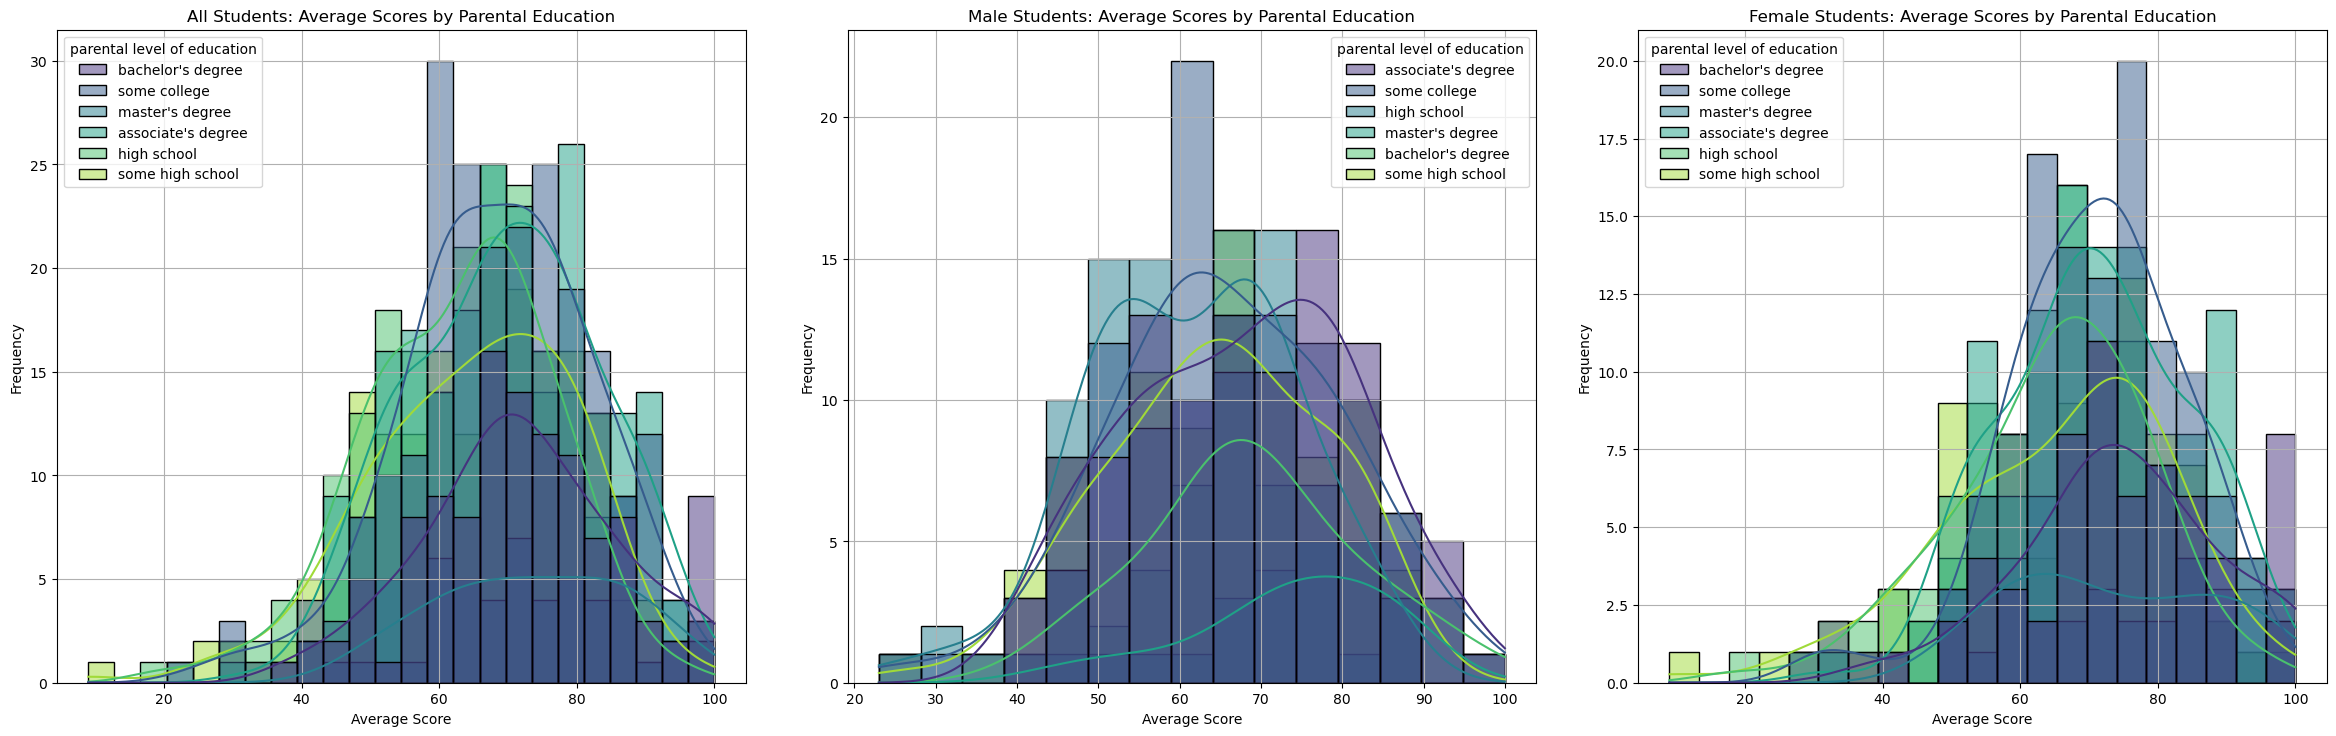

In [37]:
# Setting up the figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Histogram of Average Scores for All Students with KDE by Parental Level of Education
plt.subplot(131)  # Corrected subplot index from 141 to 131
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education', palette='viridis')
plt.title('All Students: Average Scores by Parental Education')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram of Average Scores for Male Students with KDE by Parental Level of Education
plt.subplot(132)  # Corrected subplot index from 142 to 132
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education', palette='viridis')
plt.title('Male Students: Average Scores by Parental Education')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram of Average Scores for Female Students with KDE by Parental Level of Education
plt.subplot(133)  # Corrected subplot index from 143 to 133
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education', palette='viridis')
plt.title('Female Students: Average Scores by Parental Education')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Adjust layout and display the plot
plt.tight_layout(pad=3.0)  # Adjust spacing to prevent overlap

##### Insights from Parental Education Level and Student Performance Analysis

- **Overall Impact of Parental Education**: The analysis suggests that parental education level does not significantly influence overall student performance in exams. This indicates that factors other than parental academic achievements might be more influential in student outcomes.
- **Impact on Male Students**: The data for male students shows a noticeable trend where those whose parents have either an associate's degree or a master's degree tend to perform better in exams. This may suggest that certain levels of parental education could contribute positively to the academic performance of male students.
- **Impact on Female Students**: For female students, the results indicate that there is no clear correlation between parental education levels and exam performance. This consistency across different parental education backgrounds suggests that other factors may play a more significant role in influencing academic success for female students.


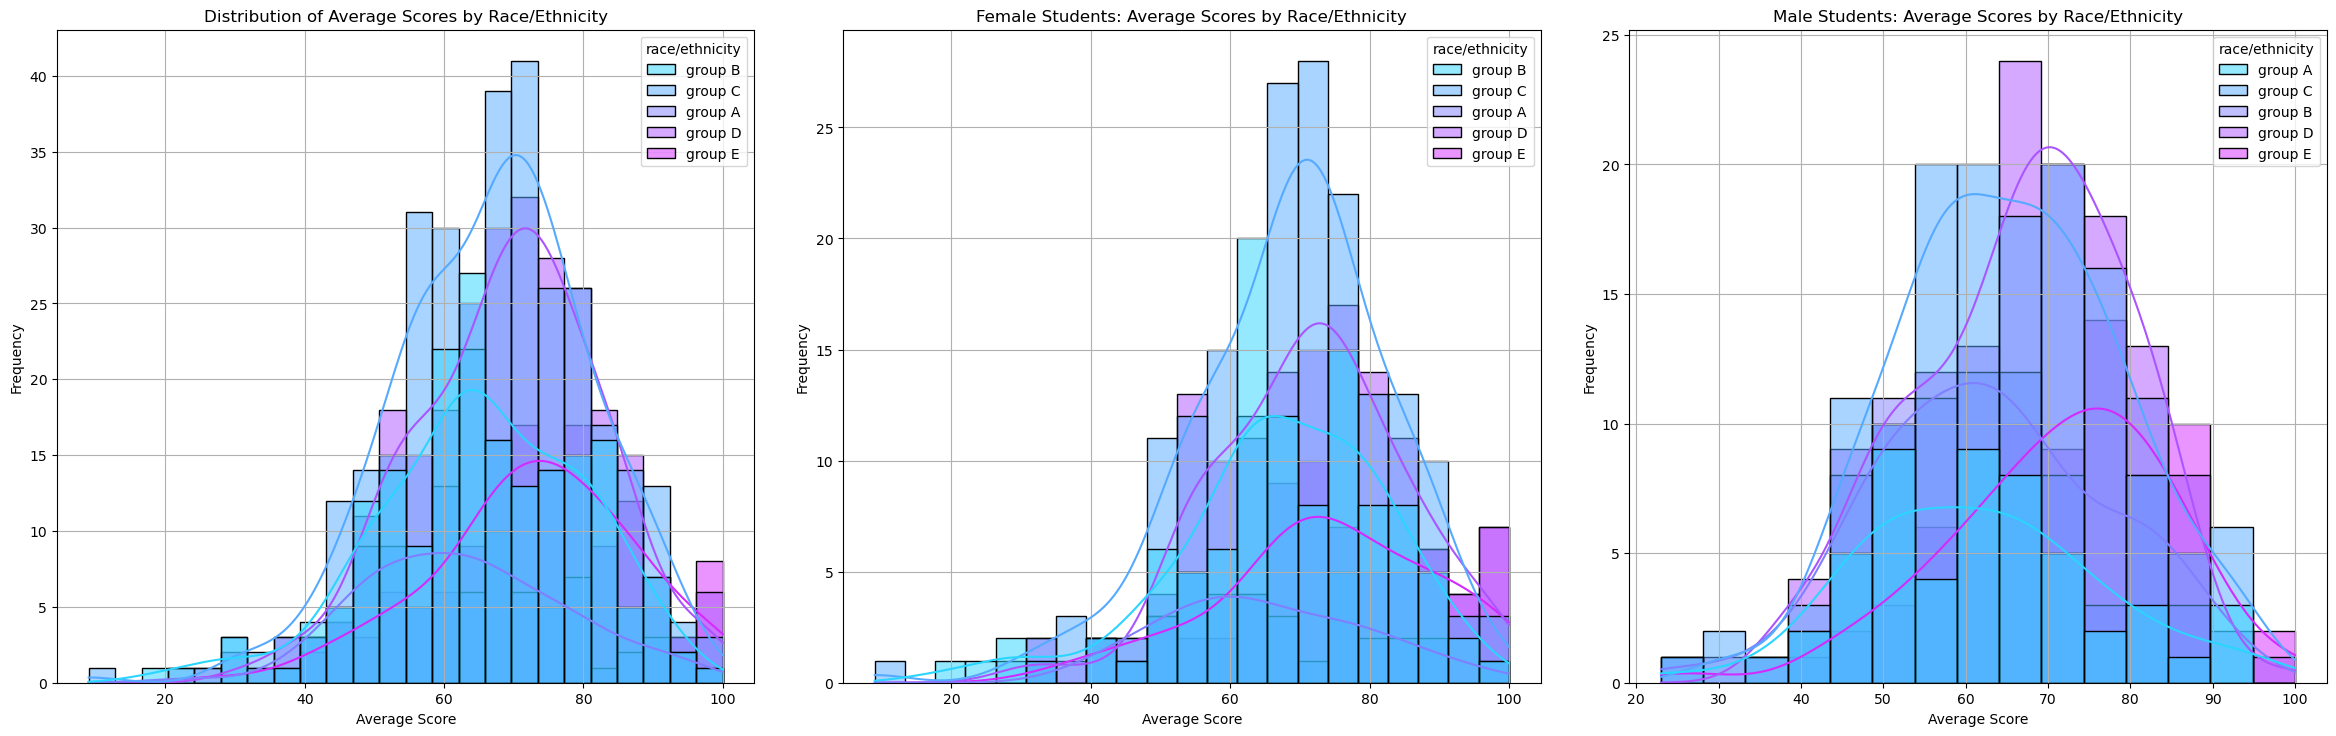

In [39]:
# Setting up the figure with three subplots, ensuring correct subplot indexing
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Histogram of Average Scores for All Students with KDE by Race/Ethnicity
plt.subplot(131)  # Corrected subplot index from 141 to 131
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', palette='cool')
plt.title('Distribution of Average Scores by Race/Ethnicity')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram of Average Scores for Female Students with KDE by Race/Ethnicity
plt.subplot(132)  # Corrected subplot index from 142 to 132
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity', palette='cool')
plt.title('Female Students: Average Scores by Race/Ethnicity')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Histogram of Average Scores for Male Students with KDE by Race/Ethnicity
plt.subplot(133)  # Corrected subplot index from 143 to 133
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity', palette='cool')
plt.title('Male Students: Average Scores by Race/Ethnicity')  # Adding a title
plt.xlabel('Average Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adding grid lines for better readability

# Adjust layout and display the plot
plt.tight_layout(pad=3.0)  # Adjust spacing to prevent overlap

##### Insights from Race/Ethnicity-Based Performance Analysis

- **Performance Trends by Race/Ethnicity**: Students belonging to Group A and Group B consistently show lower performance in exams compared to other groups. This trend indicates potential disparities that might be influenced by various socio-economic or educational factors.
- **Gender and Race/Ethnicity Impact**: The trend of lower performance among students from Group A and Group B is evident across both male and female students. This uniformity suggests that the influence of race/ethnicity on exam scores is significant, regardless of gender.


#### 4.2 Maximumum score of students in all three subjects

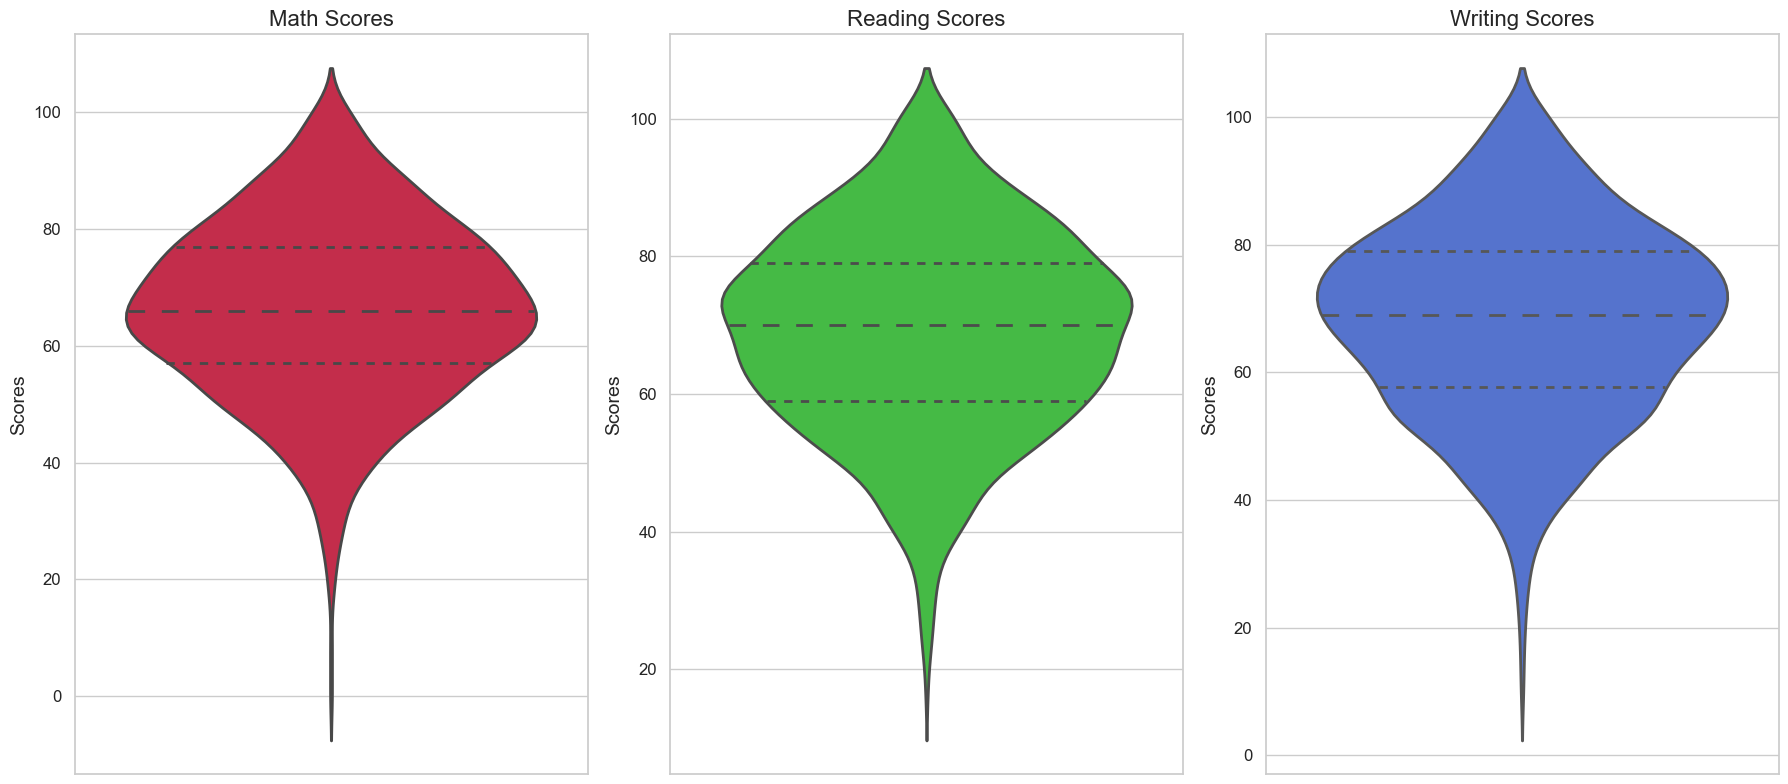

In [44]:
# Set the overall aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(24, 8))

# Math Scores Violin Plot
plt.subplot(1, 4, 1)
plt.title('Math Scores', fontsize=16)
sns.violinplot(y='math score', data=df, color='crimson', linewidth=2, inner="quartile")
plt.ylabel('Scores', fontsize=14)  # Adding a y-label for clarity
plt.yticks(fontsize=12)  # Adjust font size of y-ticks

# Reading Scores Violin Plot
plt.subplot(1, 4, 2)
plt.title('Reading Scores', fontsize=16)
sns.violinplot(y='reading score', data=df, color='limegreen', linewidth=2, inner="quartile")
plt.ylabel('Scores', fontsize=14)  # Keeping labels consistent across plots
plt.yticks(fontsize=12)  # Adjust font size of y-ticks

# Writing Scores Violin Plot
plt.subplot(1, 4, 3)
plt.title('Writing Scores', fontsize=16)
sns.violinplot(y='writing score', data=df, color='royalblue', linewidth=2, inner="quartile")
plt.ylabel('Scores', fontsize=14)  # Consistent labeling helps in easier comparison
plt.yticks(fontsize=12)  # Adjust font size of y-ticks

# Adjust layout to avoid any overlap and ensure aesthetics
plt.tight_layout()

#### Insights from Subject Score Distributions

- **Math Scores**: The violin plots reveal that the majority of students score between 60 and 80 in math. This concentration suggests a relatively higher proficiency or a possible skew towards higher performance in this subject.
- **Reading and Writing Scores**: In contrast, the distribution for reading and writing scores is broader, with most students scoring between 50 and 80. The wider spread indicates varied proficiency levels among students in these subjects.


#### 4.3 Multivariate analysis using pieplot

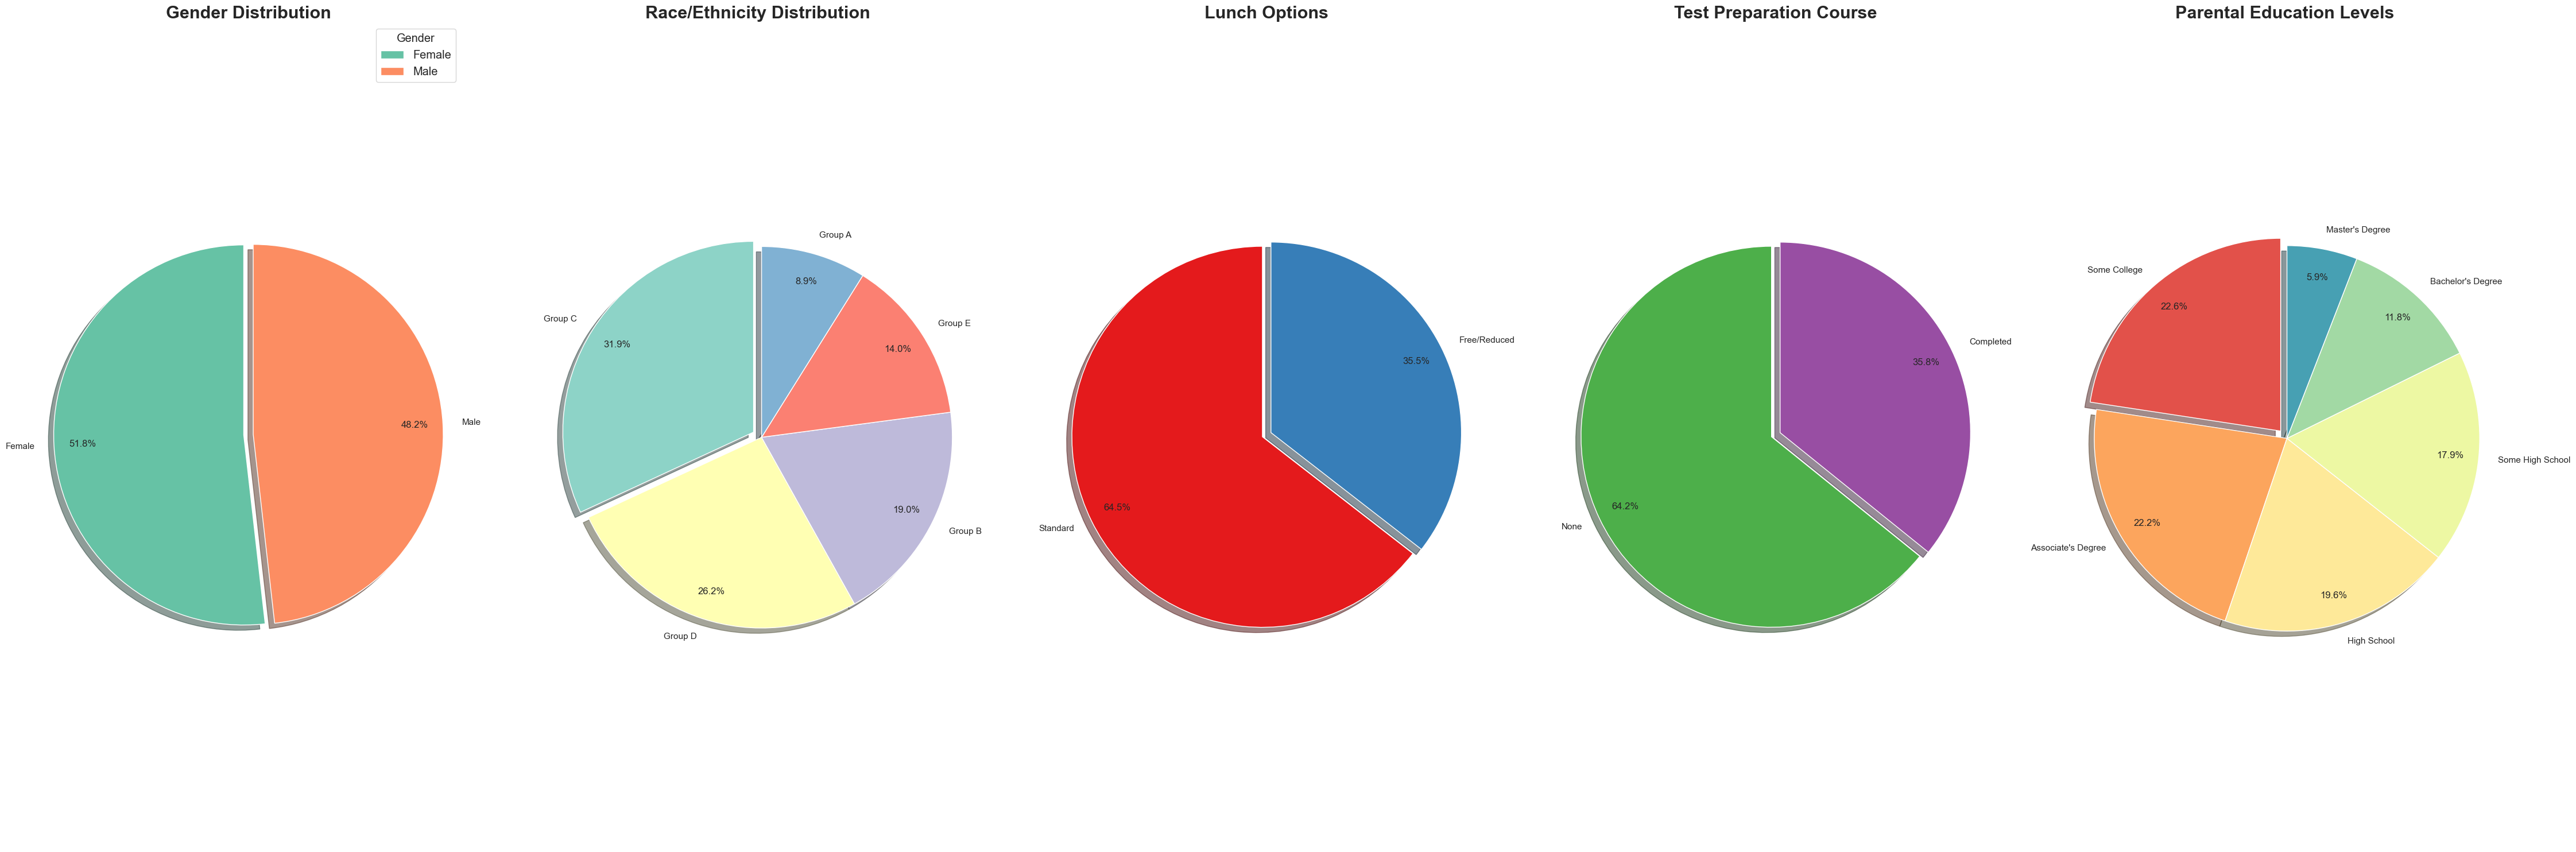

In [53]:
# Setting the overall aesthetic style
sns.set(style="whitegrid", palette="pastel")

plt.rcParams['figure.figsize'] = (45, 15)

# Enhancing font sizes and legend settings
fontdict_title = {'fontsize': 22, 'fontweight': 'bold'}
fontdict_labels = {'fontsize': 16}

# Pie chart for Gender Distribution
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = sns.color_palette('Set2')[0:2]  # Using a color palette for better aesthetics

pie_wedges = plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0), shadow=True)
plt.title('Gender Distribution', fontdict=fontdict_title)
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.legend(pie_wedges[0], labels, title="Gender", loc="best", fontsize='large', title_fontsize='large')

# Pie chart for Race/Ethnicity Distribution
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = sns.color_palette('Set3')

pie_wedges = plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0, 0, 0, 0), shadow=True)
plt.title('Race/Ethnicity Distribution', fontdict=fontdict_title)
plt.axis('equal')

# Pie chart for Lunch Options
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = sns.color_palette('Set1')[0:2]

pie_wedges = plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0), shadow=True)
plt.title('Lunch Options', fontdict=fontdict_title)
plt.axis('equal')

# Pie chart for Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = sns.color_palette('Set1')[2:4]

pie_wedges = plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0), shadow=True)
plt.title('Test Preparation Course', fontdict=fontdict_title)
plt.axis('equal')

# Pie chart for Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = sns.color_palette('Spectral')[0:6]

pie_wedges = plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0, 0, 0, 0, 0), shadow=True)
plt.title('Parental Education Levels', fontdict=fontdict_title)
plt.axis('equal')

plt.tight_layout()

##### Insights from Demographic and Educational Distributions

- **Gender Equality**: The distribution between male and female students is nearly balanced, indicating an equitable gender representation within the student body.
- **Ethnic Diversity**: Among the ethnic groups, Group C represents the largest segment of students, suggesting it is the most prevalent demographic within the studied population.
- **Lunch Provision**: A majority of students receive standard lunch, highlighting better accessibility to regular meal plans over free or reduced options.
- **Test Preparation Engagement**: More students opt out of enrolling in test preparation courses, indicating a potential area for increased academic support or resource allocation.
- **Parental Education**: The most common level of parental education is "Some College," closely followed by "Associate's Degree." This reflects a relatively high educational background among the parents of the students.


#### 4.4 Feature-Specific Visualization

#### 4.4.1 Gender Analysis
- **Gender Distribution**: How is gender represented among the student population? This analysis aims to verify the balance or imbalance between male and female students.
- **Impact of Gender on Performance**: Does gender influence academic outcomes? This inquiry explores whether there is a discernible difference in performance between male and female students across various subjects.


#### Univariate Analysis: Gender Distribution

- **Gender Distribution Overview**: This section focuses on analyzing the distribution of gender within the student population. By examining the proportion of male versus female students, we can assess the gender balance and its implications for diversity and representation in educational settings.


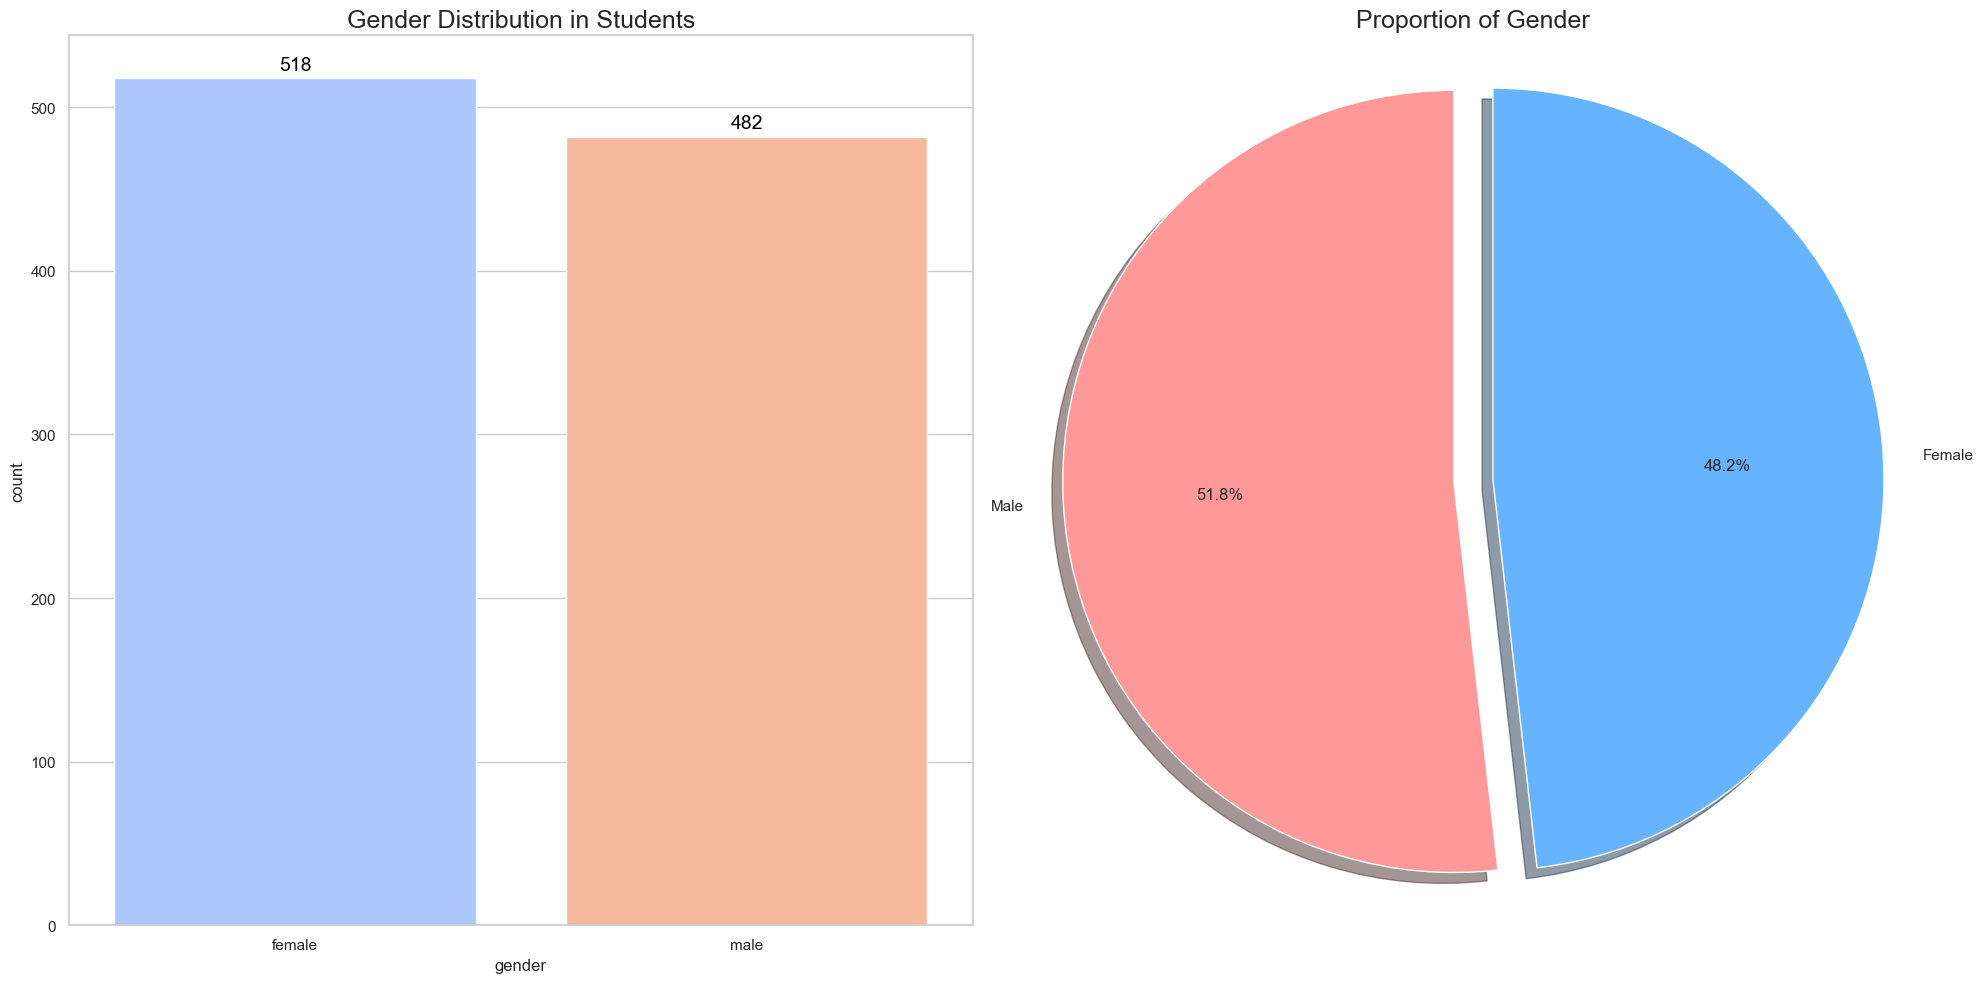

In [55]:
# Setting the overall aesthetic style
sns.set(style="whitegrid")

# Create a subplot grid with specified size and layout
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for Gender Distribution
sns.countplot(x='gender', data=df, palette='coolwarm', ax=ax[0], saturation=0.95)
ax[0].set_title('Gender Distribution in Students', fontsize=18)  # Add a title to the countplot
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', color='black', size=14, padding=3)  # Adjust label positioning and style

# Pie chart for Gender Distribution
colors = ['#ff9999', '#66b3ff']  # Set custom colors for the pie chart
explode = (0.1, 0)  # Only explode the second slice (Female)
ax[1].pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax[1].set_title('Proportion of Gender', fontsize=18)  # Add a title to the pie chart
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent any overlapping and ensure aesthetics
plt.tight_layout()

#### Insights on Gender Distribution

- **Balanced Representation**: The dataset shows a nearly balanced distribution of gender among students, with female students comprising 48% (518 students) and male students 52% (482 students). This equitable gender ratio supports diverse perspectives and interactions within the student body.


#### Bivariate Analysis: Impact of Gender on Student Performance

- **Analyzing Gender Influence**: This section explores the relationship between gender and academic performance. By examining how male and female students score across different subjects, we aim to determine if gender plays a significant role in influencing educational outcomes.


In [58]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [59]:
numeric_columns = ['math score', 'reading score', 'writing score', 'total score', 'average']
gender_group = df.groupby('gender')[numeric_columns].mean()

# Display the result
print(gender_group)

        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


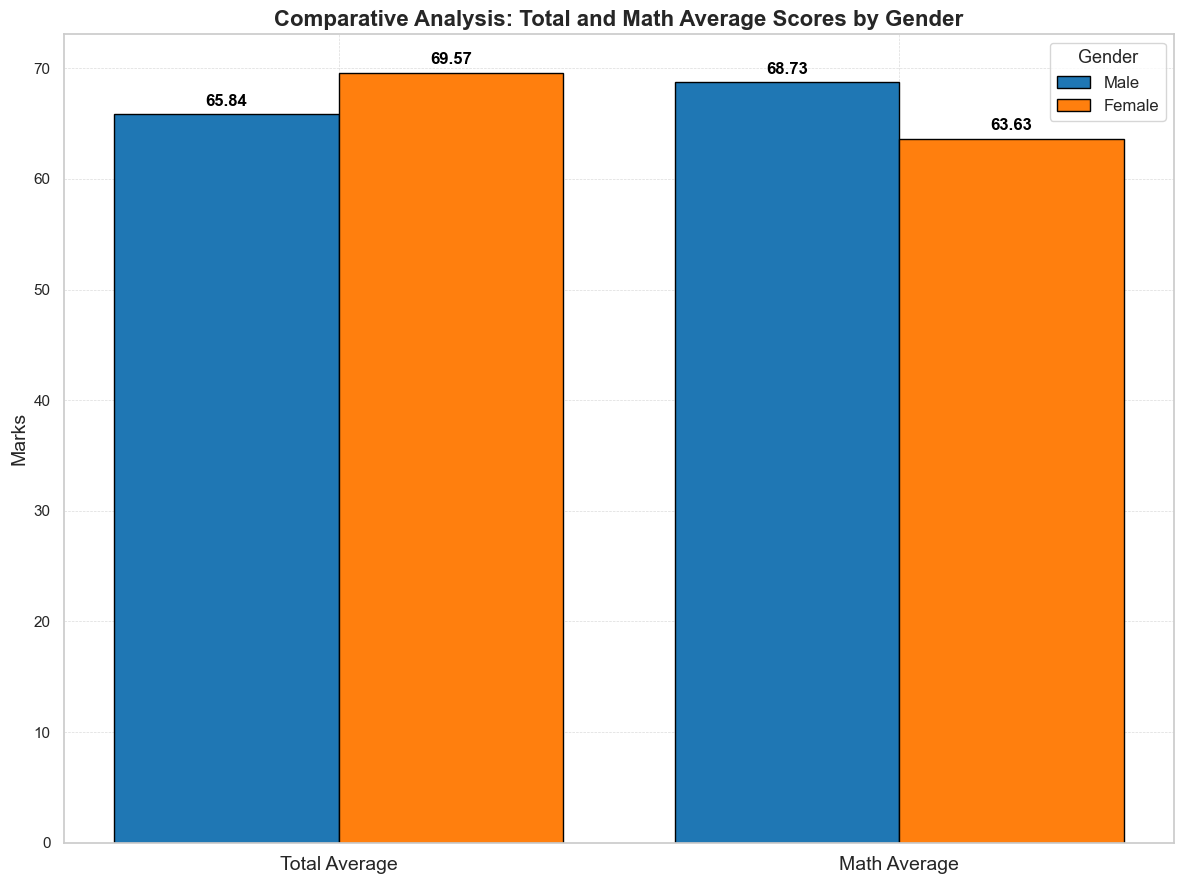

In [68]:
plt.figure(figsize=(12, 9))  # Larger figure size for better readability

X = ['Total Average', 'Math Average']

# Assuming gender_group is properly defined and includes average scores by gender
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

X_axis = np.arange(len(X))
  
# Plotting with updated aesthetics
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='#1f77b4', edgecolor='black')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#ff7f0e', edgecolor='black')
  
plt.xticks(X_axis, X, fontsize=14)
plt.ylabel("Marks", fontsize=14)
plt.title("Comparative Analysis: Total and Math Average Scores by Gender", fontweight='bold', fontsize=16)
plt.legend(title="Gender", title_fontsize='13', fontsize='12')

# Adding grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate values on the bars for clarity
for i in range(len(X_axis)):
    plt.text(i - 0.2, male_scores[i] + 0.5, f'{male_scores[i]:.2f}', ha = 'center', va = 'bottom', fontweight='bold', color='black')
    plt.text(i + 0.2, female_scores[i] + 0.5, f'{female_scores[i]:.2f}', ha = 'center', va = 'bottom', fontweight='bold', color='black')

plt.tight_layout()

#### Insights from Gender-Based Performance Analysis

- **Overall Academic Performance**: Females, on average, achieve higher total scores than their male counterparts, indicating a stronger performance across most subjects.
- **Mathematics Proficiency**: Conversely, males tend to outperform females in mathematics, highlighting a specific area where male students excel.


#### 4.4.2 Race/Ethnicity Analysis

- **Group-Wise Distribution**: This section will explore the distribution of students across different racial and ethnic groups. Understanding this distribution is crucial for assessing diversity within the student population.
- **Impact of Race/Ethnicity on Performance**: Does race or ethnicity influence student performance across various academic subjects? This analysis aims to uncover any correlations between students' racial or ethnic backgrounds and their academic achievements.


#### Univariate Analysis: Group-Wise Distribution

- **Exploring Diversity**: This analysis focuses on assessing the representation of different racial and ethnic groups within the student population. It aims to provide insights into the diversity of the student body by examining the proportion of each group.


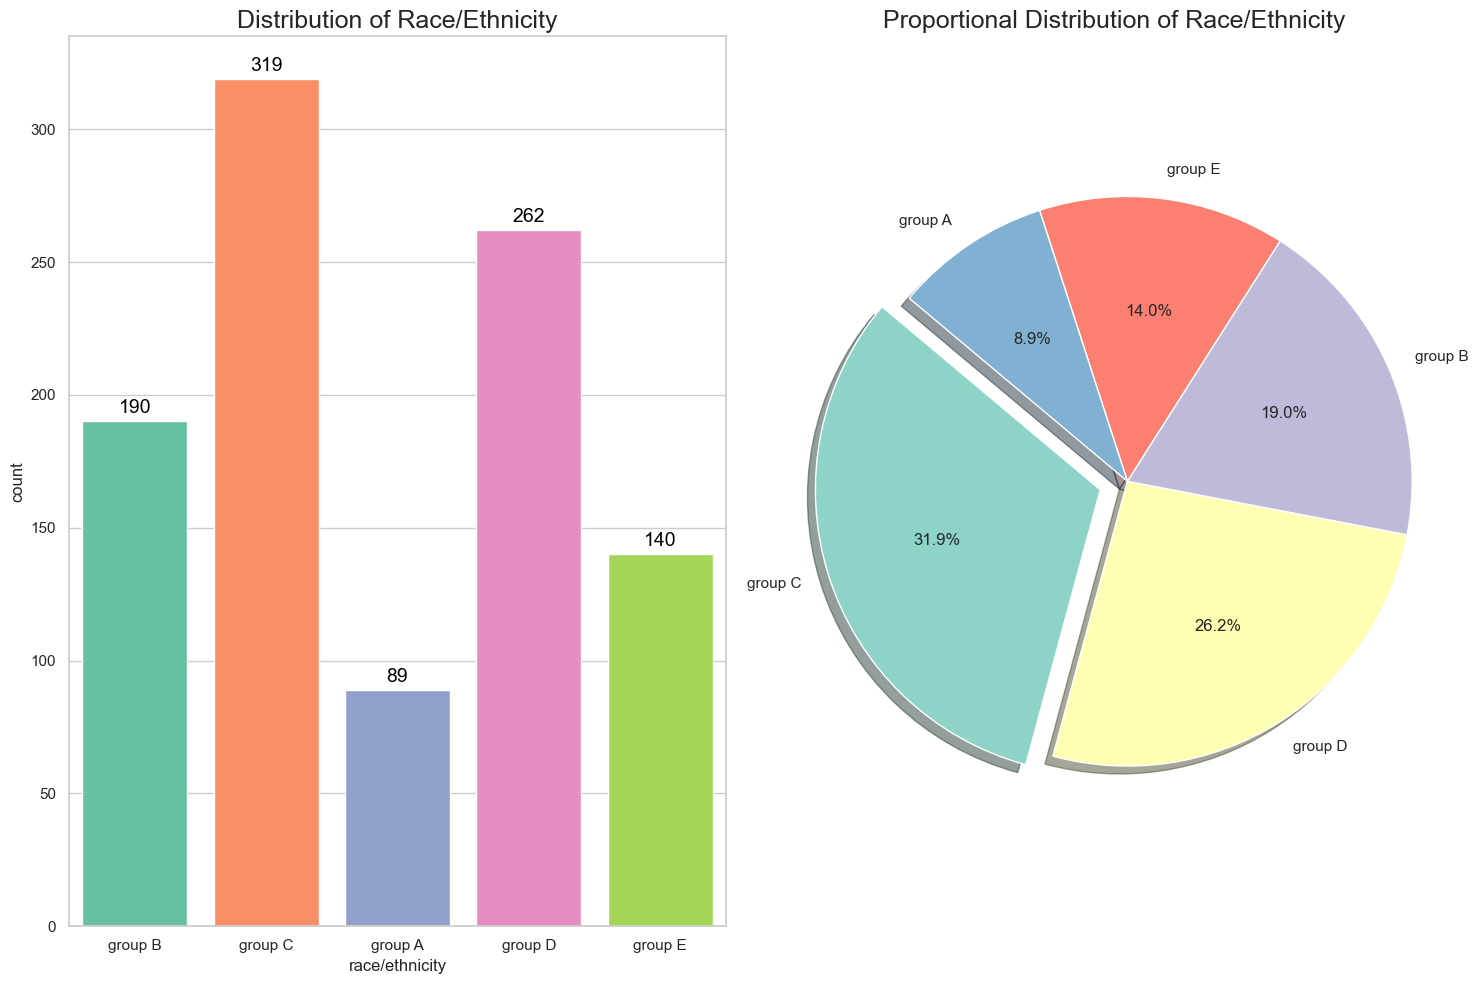

In [71]:
# Setting the overall aesthetic style
sns.set(style="whitegrid", palette="pastel")

f, ax = plt.subplots(1, 2, figsize=(15, 10))

# Countplot for race/ethnicity distribution
sns.countplot(x='race/ethnicity', data=df, palette='Set2', ax=ax[0], saturation=0.95)
ax[0].set_title('Distribution of Race/Ethnicity', fontsize=18)  # Adding a title to the countplot
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', color='black', size=14, padding=3)  # Adjust label positioning and style

# Pie chart for race/ethnicity distribution
colors = sns.color_palette('Set3')  # A visually appealing color palette
explode = (0.1, 0, 0, 0, 0)  # Exploding the first slice for emphasis
pie_wedges = ax[1].pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, 
                       explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, startangle=140)
ax[1].set_title('Proportional Distribution of Race/Ethnicity', fontsize=18)  # Adding a title to the pie chart
ax[1].axis('equal')  # Ensure the pie chart is a circle

plt.tight_layout()  # Adjust layout to avoid overlap and ensure aesthetics

#### Insights from Race/Ethnicity Distribution Analysis

- **Predominant Groups**: A significant portion of the student population belongs to Group C and Group D, indicating that these are the most prevalent racial or ethnic groups within the school.
- **Underrepresented Group**: Group A has the smallest representation among the students, highlighting it as the least populous racial or ethnic group in the dataset.


#### Bivariate Analysis: Impact of Race/Ethnicity on Student Performance

- **Investigating Racial/Ethnic Influence**: This section delves into whether students' racial or ethnic backgrounds correlate with their academic performance across various subjects. The analysis seeks to identify if certain racial or ethnic groups exhibit distinct performance patterns, potentially reflecting differences in educational outcomes influenced by background.


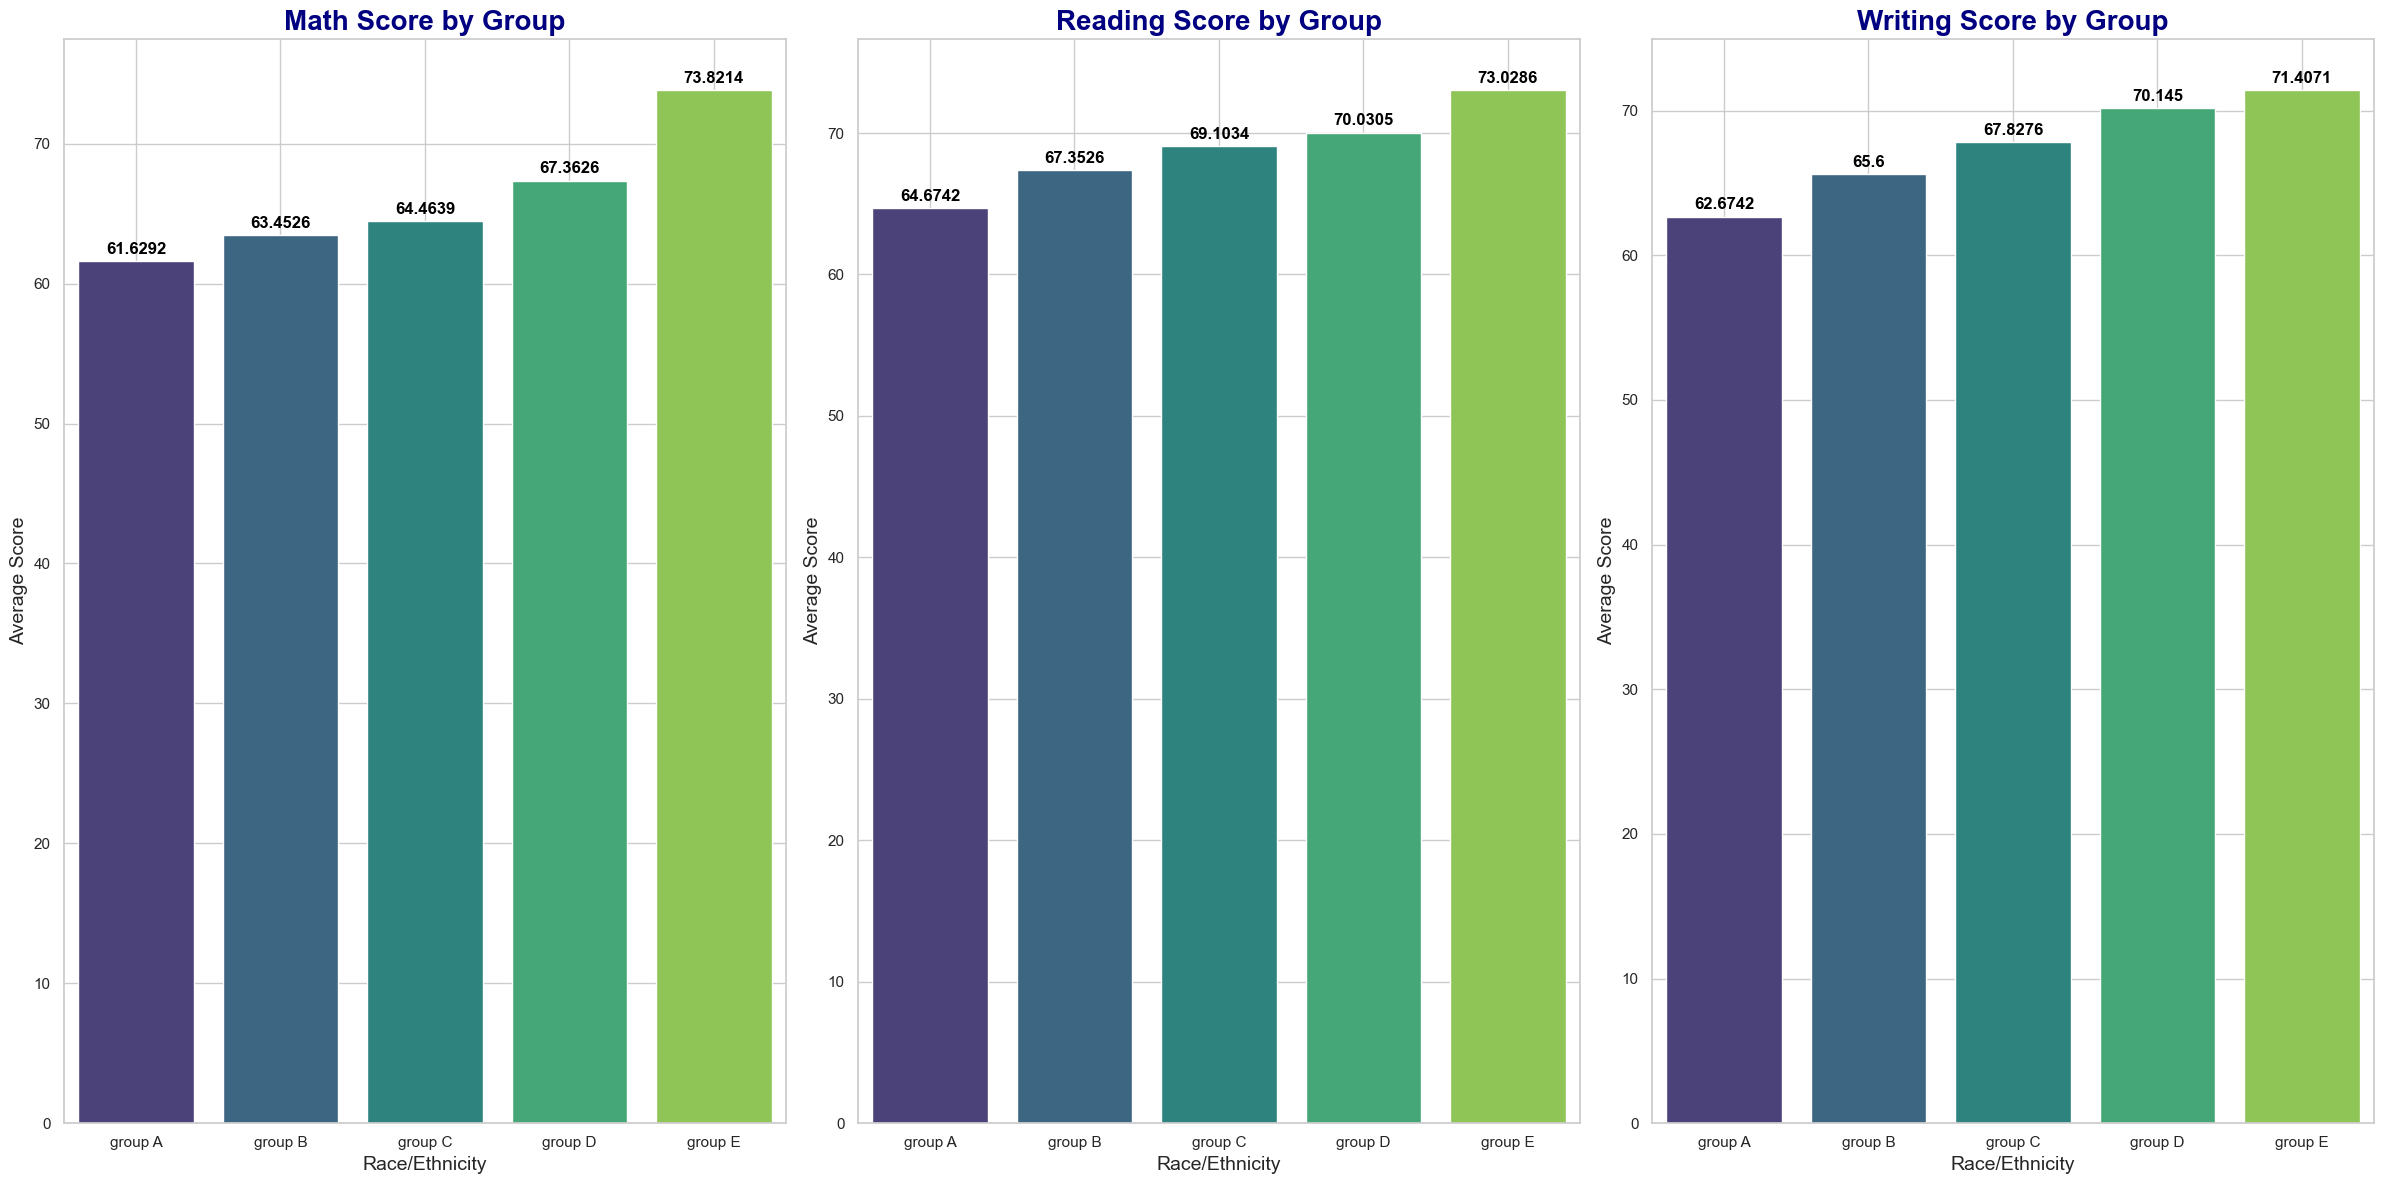

In [74]:
# Setting up the figure and axes
f, ax = plt.subplots(1, 3, figsize=(24, 12))  # Adjust the size for better display

# Unified color palette for all plots
palette = sns.color_palette("viridis", n_colors=5)  # A consistent and pleasing palette

# Math score plot
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette=palette, ax=ax[0])
ax[0].set_title('Math Score by Group', fontsize=20, fontweight='bold', color='navy')
ax[0].set_ylabel('Average Score', fontsize=14)
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].grid(True)

# Adding labels directly on bars
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3, size=12, color='black', fontweight='bold')

# Reading score plot
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette=palette, ax=ax[1])
ax[1].set_title('Reading Score by Group', fontsize=20, fontweight='bold', color='navy')
ax[1].set_ylabel('Average Score', fontsize=14)
ax[1].set_xlabel('Race/Ethnicity', fontsize=14)
ax[1].grid(True)

for container in ax[1].containers:
    ax[1].bar_label(container, label_type='edge', padding=3, size=12, color='black', fontweight='bold')

# Writing score plot
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette=palette, ax=ax[2])
ax[2].set_title('Writing Score by Group', fontsize=20, fontweight='bold', color='navy')
ax[2].set_ylabel('Average Score', fontsize=14)
ax[2].set_xlabel('Race/Ethnicity', fontsize=14)
ax[2].grid(True)

for container in ax[2].containers:
    ax[2].bar_label(container, label_type='edge', padding=3, size=12, color='black', fontweight='bold')

# Adjust layout to prevent overlap and ensure aesthetics
plt.tight_layout()

#### Insights from Race/Ethnicity-Based Performance Analysis

- **Top Performers**: Students from Group E consistently achieve the highest scores across all subjects, suggesting that this group may have access to superior resources or more effective educational support.
- **Lowest Scores**: Conversely, students from Group A register the lowest marks, indicating potential challenges that could be linked to less access to educational resources or other socio-economic factors.
- **Socioeconomic Influence**: The performance trends across the groups suggest a correlation between socioeconomic status and academic achievement. Students from groups traditionally associated with lower socioeconomic status tend to score lower on average in all course subjects.


#### 4.4.3 Parental Level of Education Analysis

- **Educational Background Overview**: This section examines the various levels of education attained by the students' parents. Understanding the educational backgrounds represented within the student body can provide insights into the educational environment and support structures at home.
- **Impact of Parental Education on Student Performance**: Does the level of education achieved by parents influence their children's academic outcomes? This analysis aims to explore potential correlations between parental education levels and student performance across different subjects.


#### Univariate Analysis: Educational Background of Students' Parents

- **Parental Education Levels**: This analysis focuses on understanding the distribution of educational attainment among the parents of students. By examining the proportions of different education levels, we aim to gain insights into the parental support environment and its potential implications for student success.


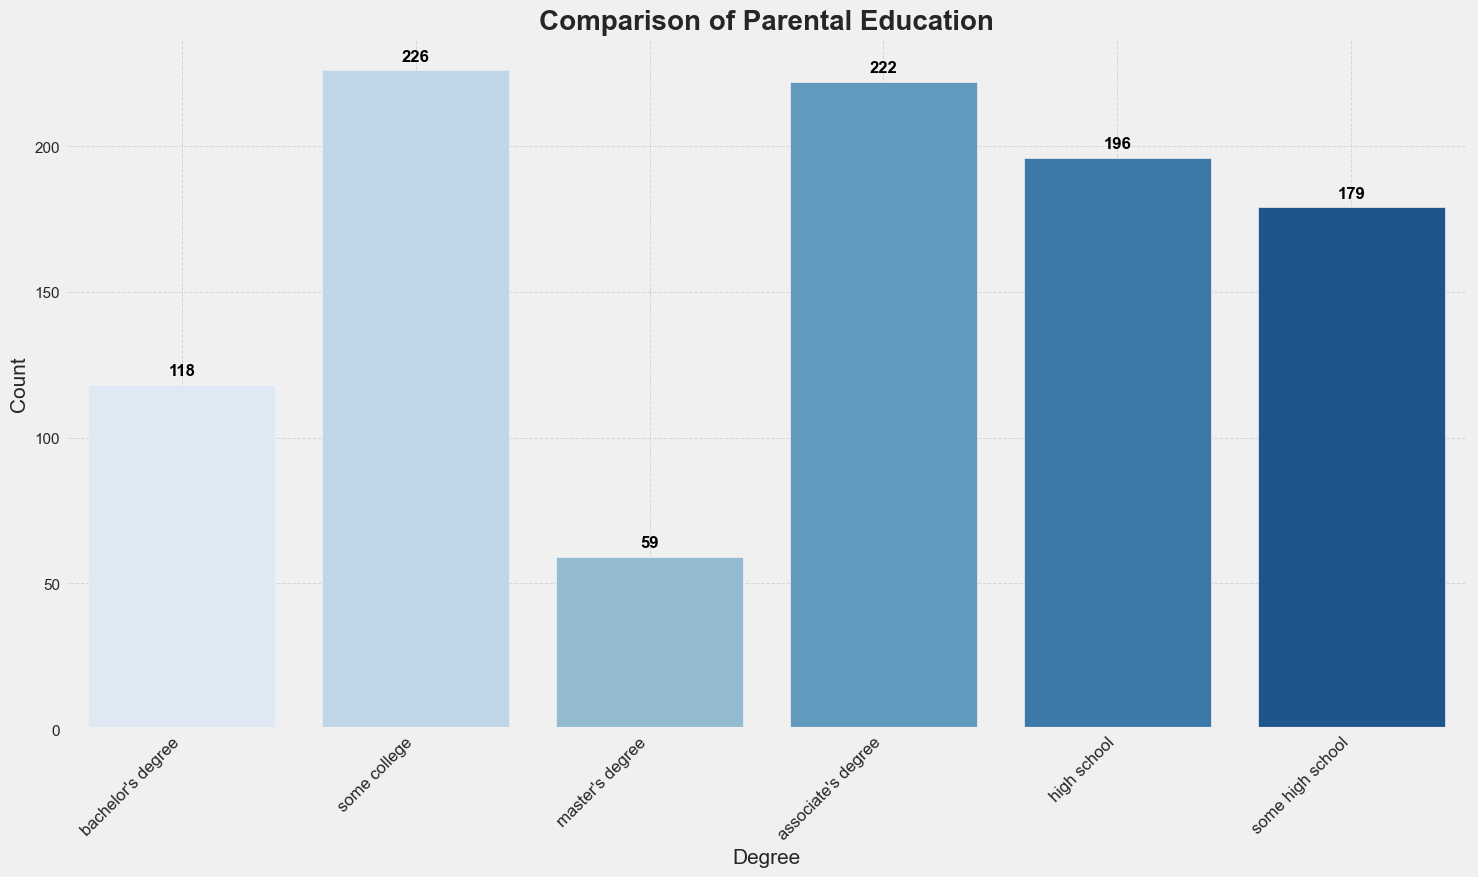

In [79]:
# Setting figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create count plot
ax = sns.countplot(data=df, x='parental level of education', palette='Blues')
ax.set_title('Comparison of Parental Education', fontweight='bold', fontsize=20)
ax.set_xlabel('Degree', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add bar labels for clarity
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, size=12, color='black', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout and display plot
plt.tight_layout()

#### Insights from Parental Education Distribution

- **Predominant Education Level**: The majority of parents have attended some college, indicating a relatively high level of educational attainment within the parent community. This could imply a strong educational support environment for the students.


#### Bivariate Analysis: Impact of Parental Education on Student Performance

- **Exploring the Influence of Parental Education**: This analysis investigates whether the educational attainment of parents correlates with their children's academic performance. By examining student scores across different subjects in relation to their parents' education levels, we aim to identify any significant patterns or trends.


<Figure size 1500x1500 with 0 Axes>

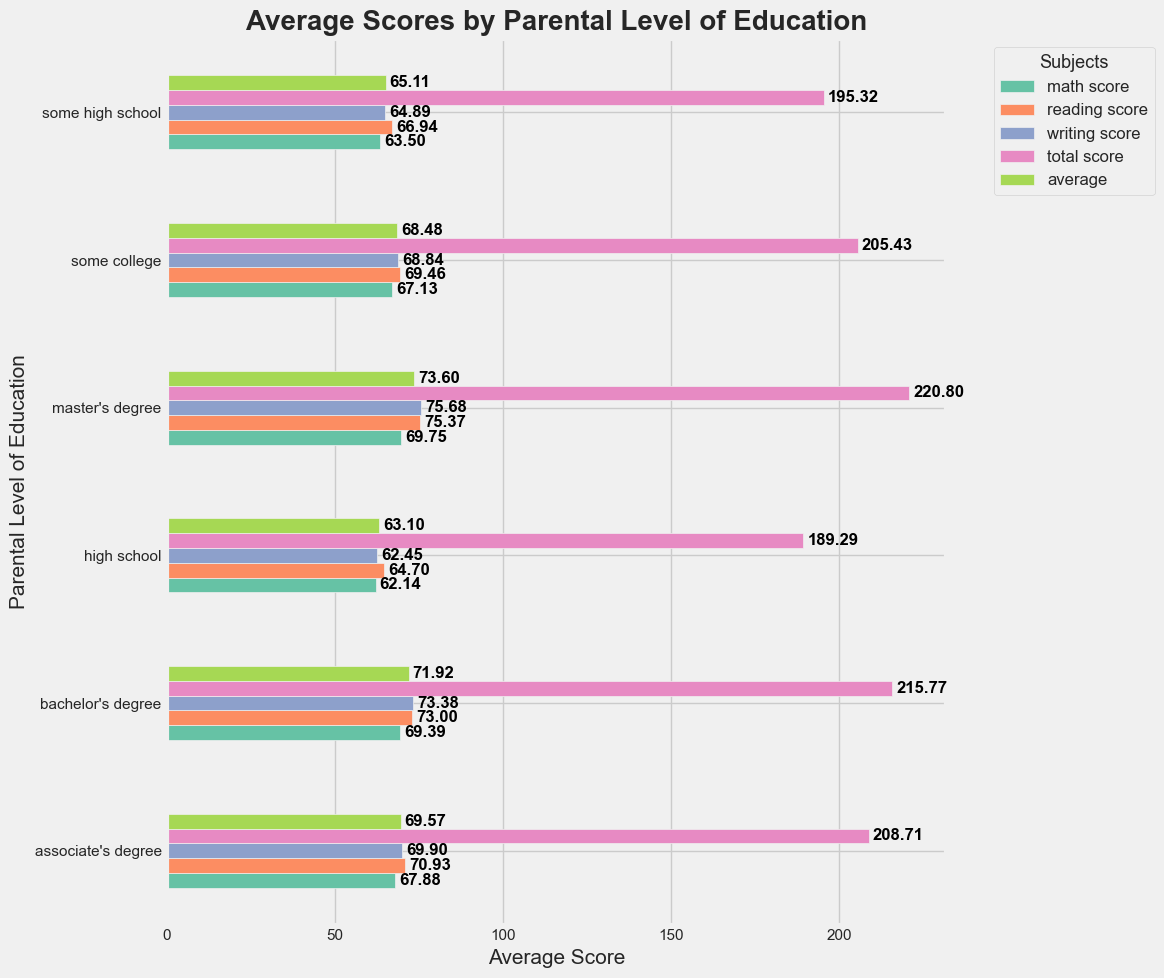

In [83]:
# Calculate the mean scores for relevant columns grouped by parental level of education
mean_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'total score', 'average']].mean()

# Plotting the mean scores as a horizontal bar plot
plt.figure(figsize=(15, 15))
ax = mean_scores.plot(kind='barh', figsize=(12, 10), color=sns.color_palette('Set2'))

# Add titles and labels
plt.title('Average Scores by Parental Level of Education', fontsize=20, fontweight='bold')
plt.xlabel('Average Score', fontsize=15)
plt.ylabel('Parental Level of Education', fontsize=15)

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, size=12, color='black', fontweight='bold')

# Move the legend outside of the plot
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

# Adjust layout for better readability
plt.tight_layout()

#### Insights from Parental Education and Student Performance Analysis

- **Higher Scores with Advanced Parental Education**: Students whose parents hold a master's or bachelor's degree tend to achieve higher scores compared to their peers. This suggests that a higher level of parental education may positively influence a student's academic performance, possibly due to greater emphasis on education or better support structures at home.


#### 4.4.4 Lunch Analysis

- **Common Lunch Type**: This analysis identifies the most common type of lunch among students, providing insights into the dietary habits and socio-economic background of the student population.
- **Impact of Lunch Type on Test Results**: By examining the correlation between the type of lunch (standard or free/reduced) and student performance, we aim to understand if and how nutrition affects academic outcomes.


#### Univariate Analysis: Common Lunch Types Among Students

- **Identifying Common Lunch Types**: This section explores the distribution of lunch types (standard or free/reduced) among the student population. By analyzing which lunch type is most prevalent, we can gain insights into the socio-economic factors and dietary habits that may influence student well-being and performance.


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


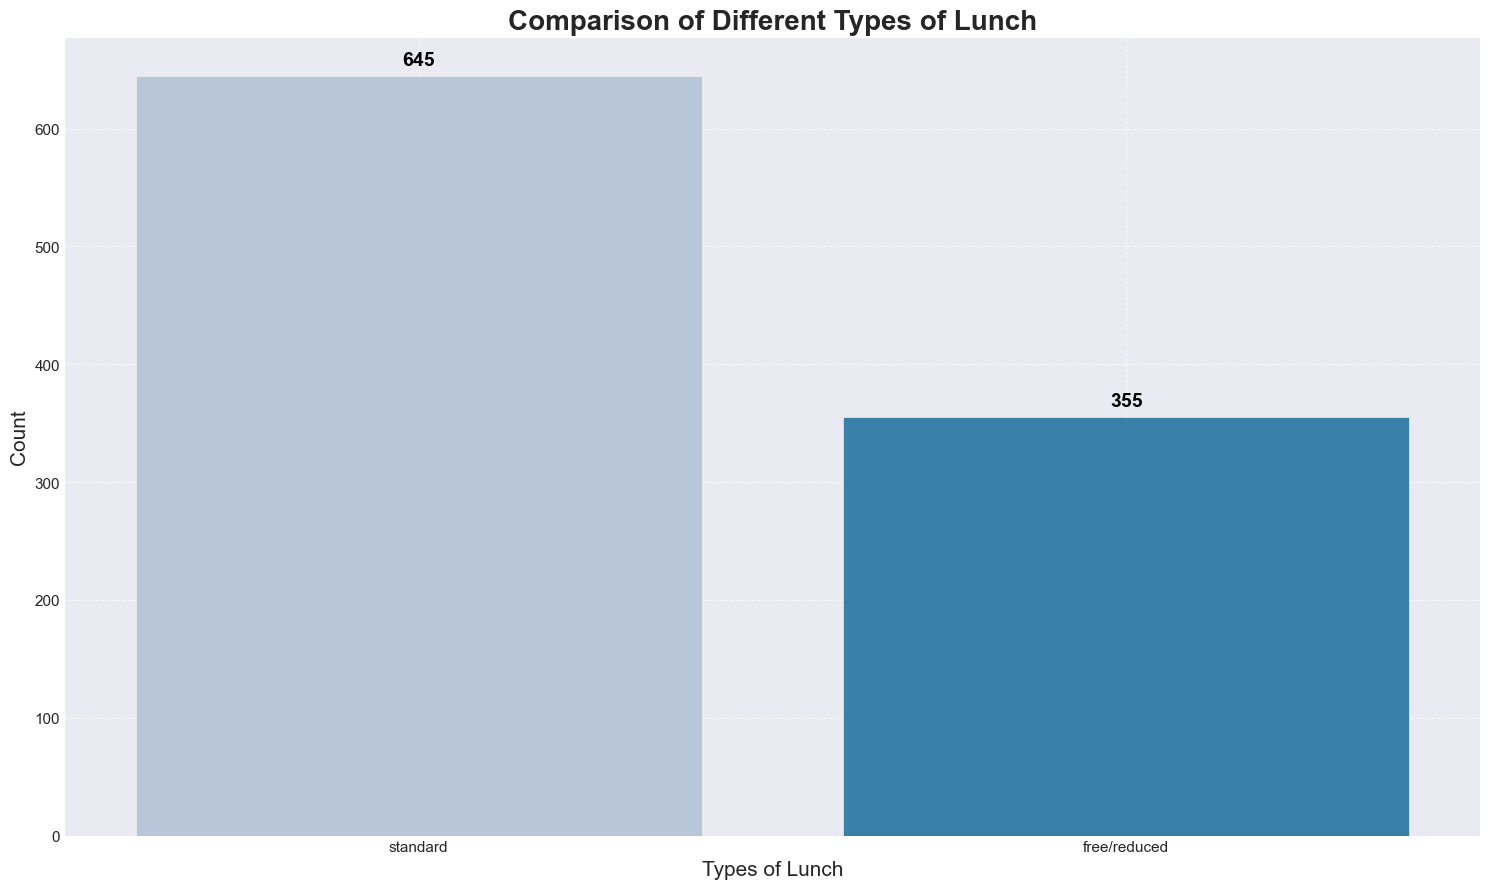

In [88]:
# Check available styles
print(plt.style.available)

# Setting figure size and using a valid style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-darkgrid')

# Create count plot
ax = sns.countplot(data=df, x='lunch', palette='PuBu')
ax.set_title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
ax.set_xlabel('Types of Lunch', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add bar labels for clarity
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, size=14, color='black', fontweight='bold')

# Adjust layout and display plot
plt.tight_layout()

#### Insights from Lunch Type Distribution

- **Prevalence of Standard Lunch**: The analysis reveals that a greater number of students are served standard lunch compared to those receiving free or reduced lunch. This suggests that the majority of students have access to regular meal plans, which may reflect the socio-economic status of the student population.


#### Bivariate Analysis: Impact of Lunch Type on Student Performance

- **Examining the Influence of Lunch Type**: This section investigates whether the type of lunch (standard or free/reduced) has any correlation with students' academic performance. By analyzing the test scores in relation to the type of lunch consumed, we aim to determine if nutritional differences influence educational outcomes.


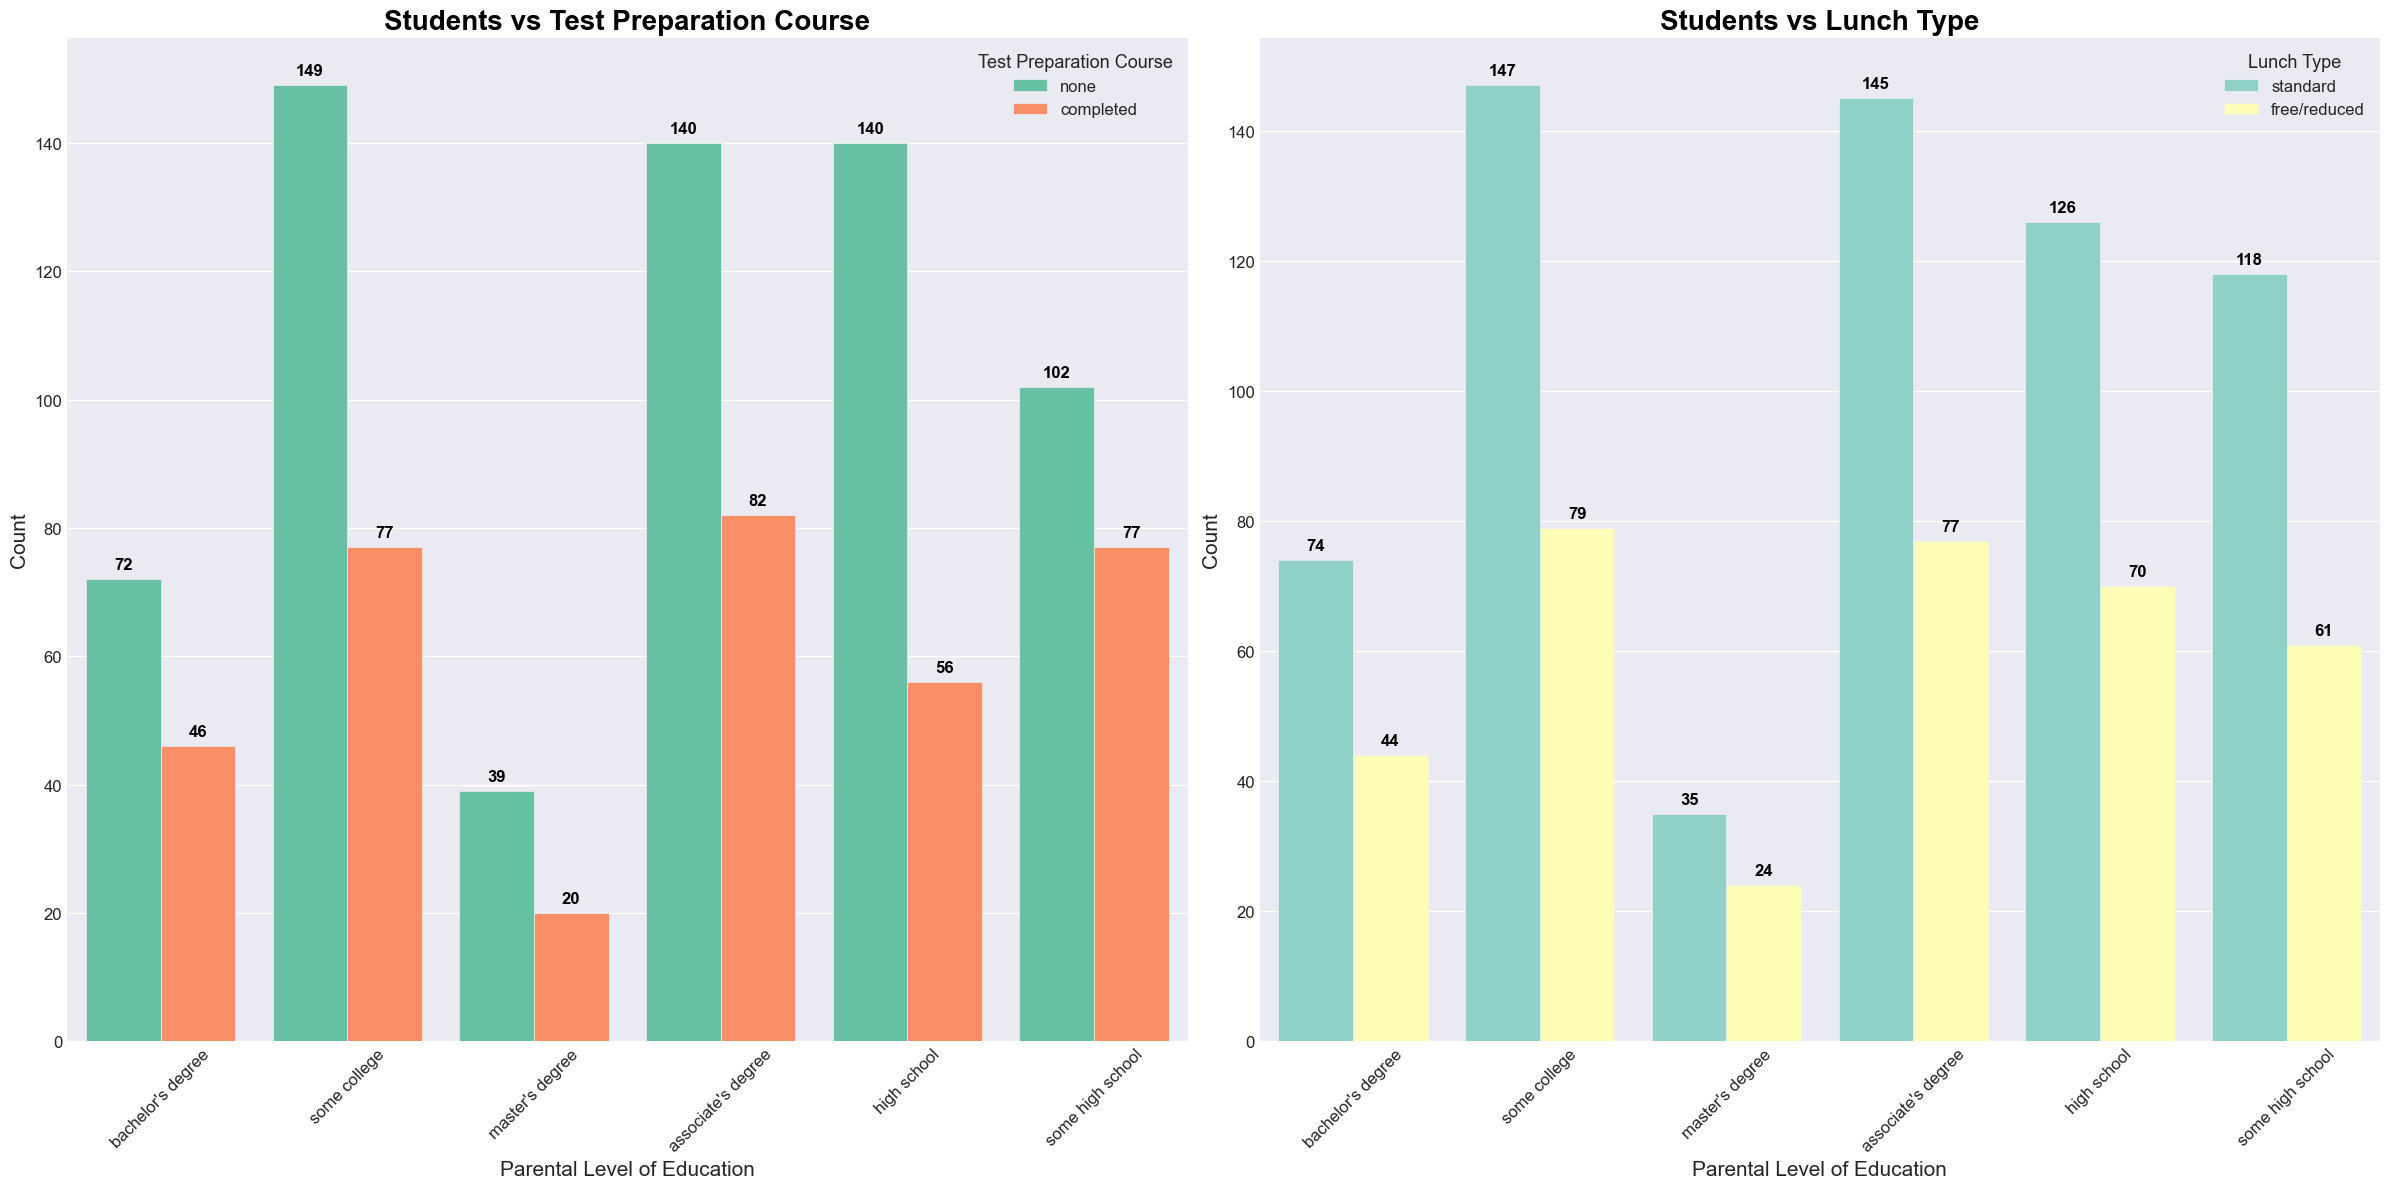

In [92]:
# Setting up the figure and axes
f, ax = plt.subplots(1, 2, figsize=(24, 12))

# Plot for Students vs Test Preparation Course
sns.countplot(x='parental level of education', data=df, palette='Set2', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', fontsize=20, fontweight='bold', color='black')
ax[0].set_xlabel('Parental Level of Education', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].tick_params(axis='x', rotation=45, labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend(title='Test Preparation Course', title_fontsize='13', fontsize='12')
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=5, size=12, color='black', fontweight='bold')

# Plot for Students vs Lunch Type
sns.countplot(x='parental level of education', data=df, palette='Set3', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', fontsize=20, fontweight='bold', color='black')
ax[1].set_xlabel('Parental Level of Education', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
ax[1].tick_params(axis='x', rotation=45, labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend(title='Lunch Type', title_fontsize='13', fontsize='12')
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='edge', padding=5, size=12, color='black', fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()

#### Insights from Lunch Type and Performance Analysis

- **Impact of Standard Lunch on Performance**: Students who receive standard lunch consistently perform better compared to those who receive free or reduced lunch. This suggests that access to standard meal plans may contribute positively to academic outcomes, potentially due to better nutrition and overall well-being.


#### 4.4.5 Test Preparation Course Analysis

- **Common Lunch Type Among Students**: This analysis identifies the most common type of lunch among students, providing insights into the dietary habits and socio-economic background of the student population.
- **Impact of Test Preparation Course on Performance**: By examining the correlation between enrollment in a test preparation course and student performance, we aim to understand if participating in such courses positively influences academic outcomes.


#### Bivariate Analysis: Impact of Test Preparation Course on Student Performance

- **Examining the Effect of Test Preparation Courses**: This section investigates whether participation in a test preparation course correlates with improved student performance. By analyzing test scores of students who have completed the course versus those who have not, we aim to determine the effectiveness of test preparation courses on academic outcomes.


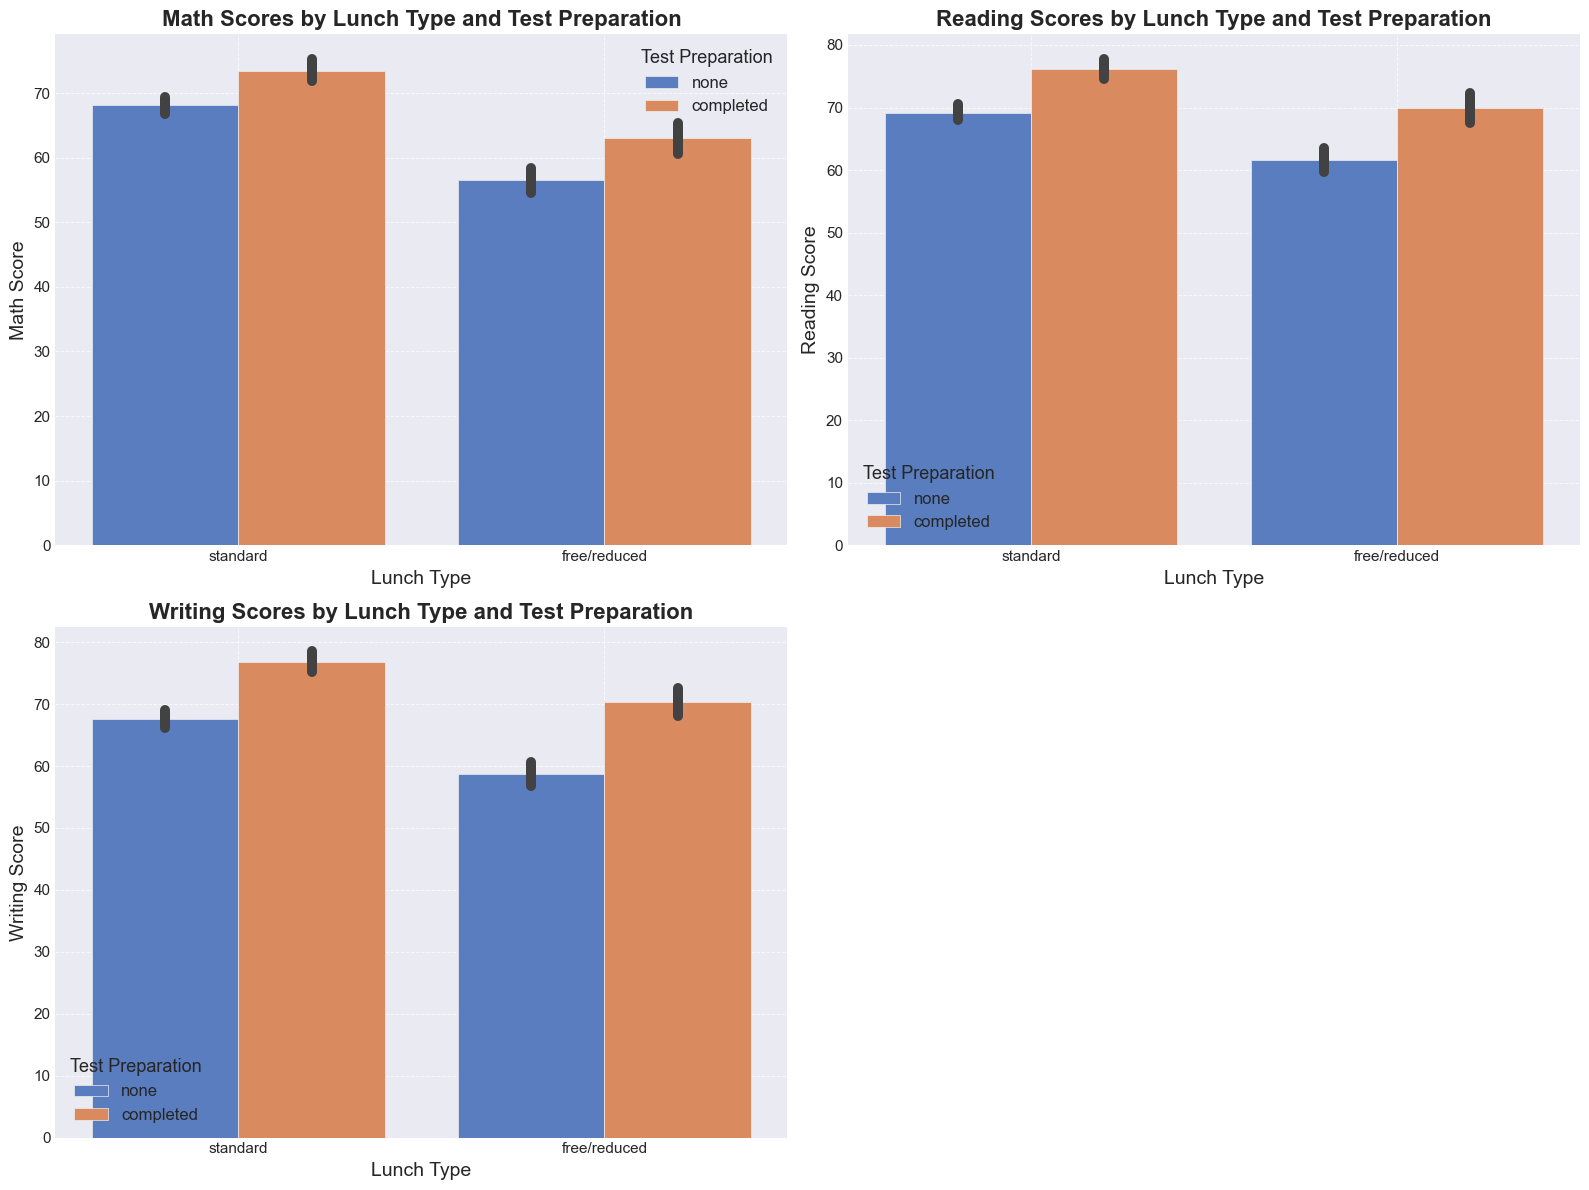

In [94]:
# Setting figure size
plt.figure(figsize=(16, 12))

# Plot for Math Scores
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df, palette='muted')
plt.title('Math Scores by Lunch Type and Test Preparation', fontsize=16, fontweight='bold')
plt.xlabel('Lunch Type', fontsize=14)
plt.ylabel('Math Score', fontsize=14)
plt.legend(title='Test Preparation', title_fontsize='13', fontsize='12')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Plot for Reading Scores
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df, palette='muted')
plt.title('Reading Scores by Lunch Type and Test Preparation', fontsize=16, fontweight='bold')
plt.xlabel('Lunch Type', fontsize=14)
plt.ylabel('Reading Score', fontsize=14)
plt.legend(title='Test Preparation', title_fontsize='13', fontsize='12')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Plot for Writing Scores
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df, palette='muted')
plt.title('Writing Scores by Lunch Type and Test Preparation', fontsize=16, fontweight='bold')
plt.xlabel('Lunch Type', fontsize=14)
plt.ylabel('Writing Score', fontsize=14)
plt.legend(title='Test Preparation', title_fontsize='13', fontsize='12')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout and display plot
plt.tight_layout()

#### Insights from Test Preparation Course and Performance Analysis

- **Positive Impact of Test Preparation Courses**: Students who have completed the test preparation course consistently achieve higher scores in all three subjects—math, reading, and writing—compared to those who have not taken the course. This suggests that participation in test preparation courses can significantly enhance academic performance.


#### 4.4.6 Checking for Outliers

- **Identifying Outliers in Student Scores**: This section focuses on detecting outliers in the various academic scores


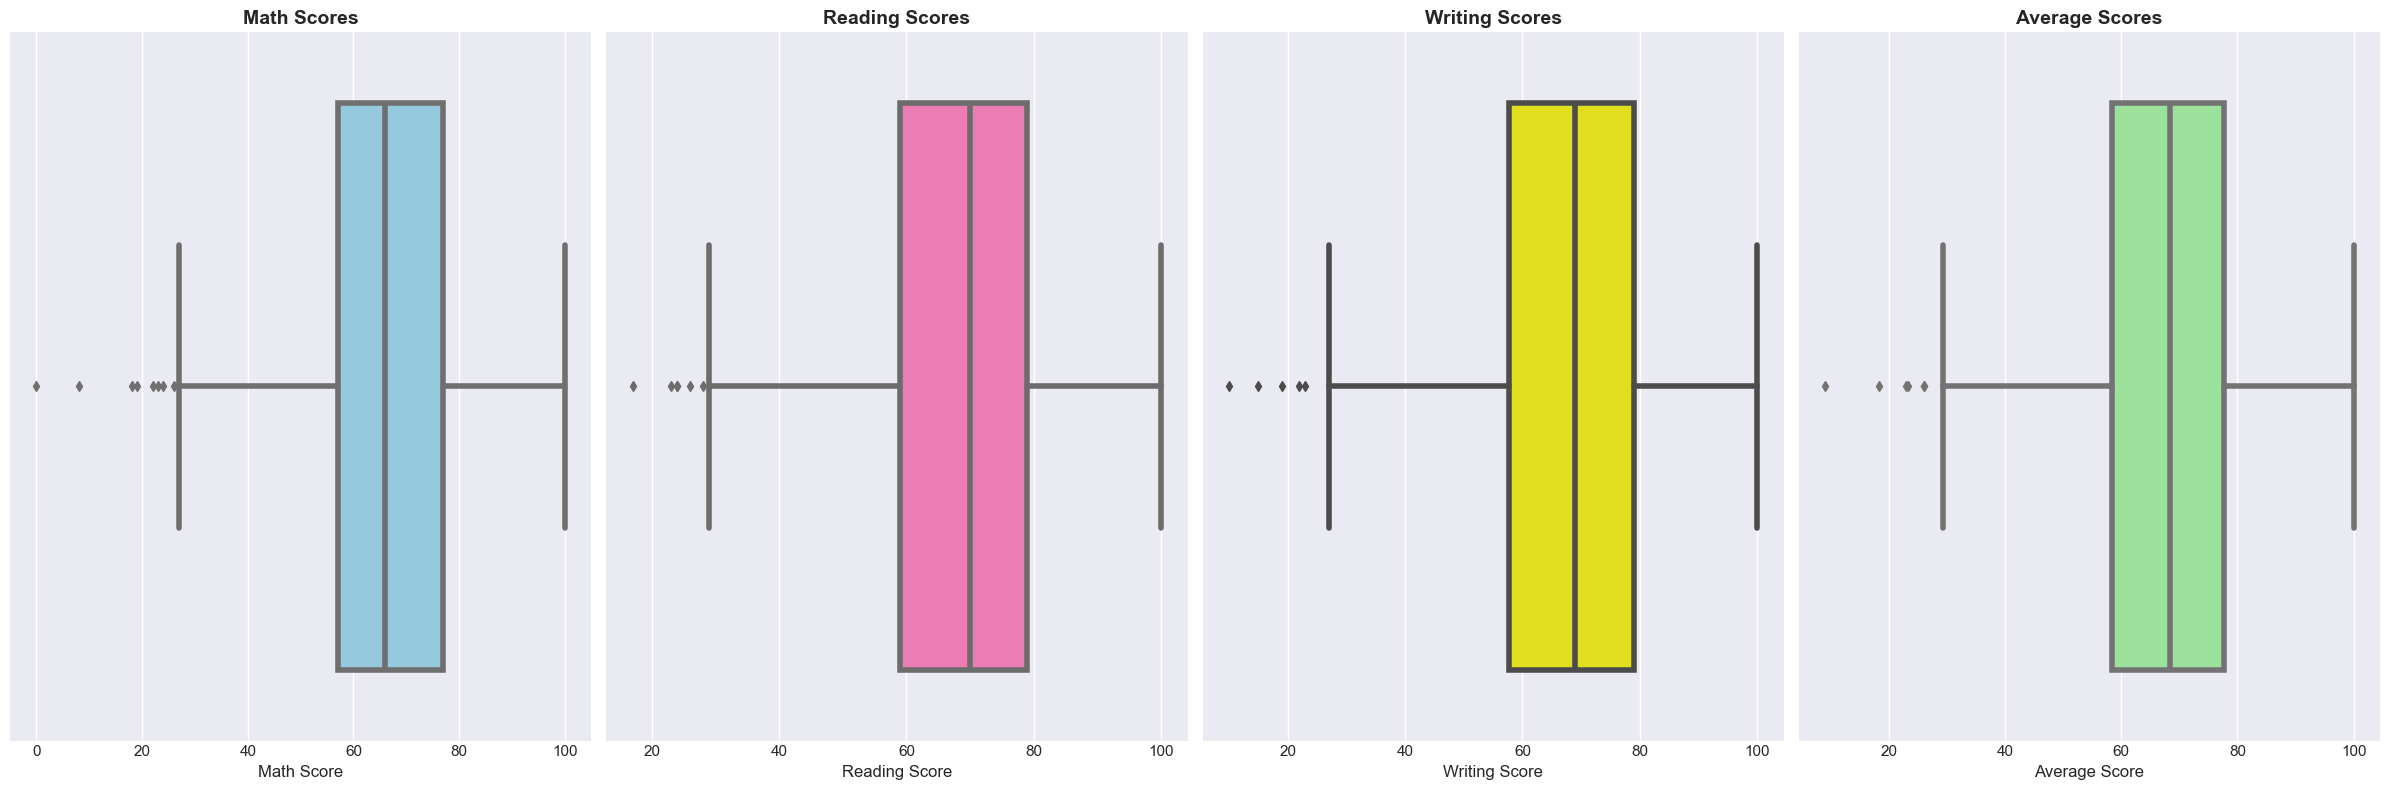

In [98]:
# Setting figure size
plt.figure(figsize=(24, 8))

# Plot for Math Scores
plt.subplot(141)
sns.boxplot(x=df['math score'], color='skyblue')
plt.title('Math Scores', fontsize=14, fontweight='bold')
plt.xlabel('Math Score', fontsize=12)

# Plot for Reading Scores
plt.subplot(142)
sns.boxplot(x=df['reading score'], color='hotpink')
plt.title('Reading Scores', fontsize=14, fontweight='bold')
plt.xlabel('Reading Score', fontsize=12)

# Plot for Writing Scores
plt.subplot(143)
sns.boxplot(x=df['writing score'], color='yellow')
plt.title('Writing Scores', fontsize=14, fontweight='bold')
plt.xlabel('Writing Score', fontsize=12)

# Plot for Average Scores
plt.subplot(144)
sns.boxplot(x=df['average'], color='lightgreen')
plt.title('Average Scores', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)

# Adjust layout and display plot
plt.tight_layout()

#### 4.4.7 Multivariate Analysis Using Pairplot

- **Exploring Relationships Between Variables**: This section utilizes pair plots to examine the relationships between multiple variables, including math, reading, and writing scores, along with average scores. Pair plots are a valuable tool for visualizing correlations and interactions between different academic performance metrics.


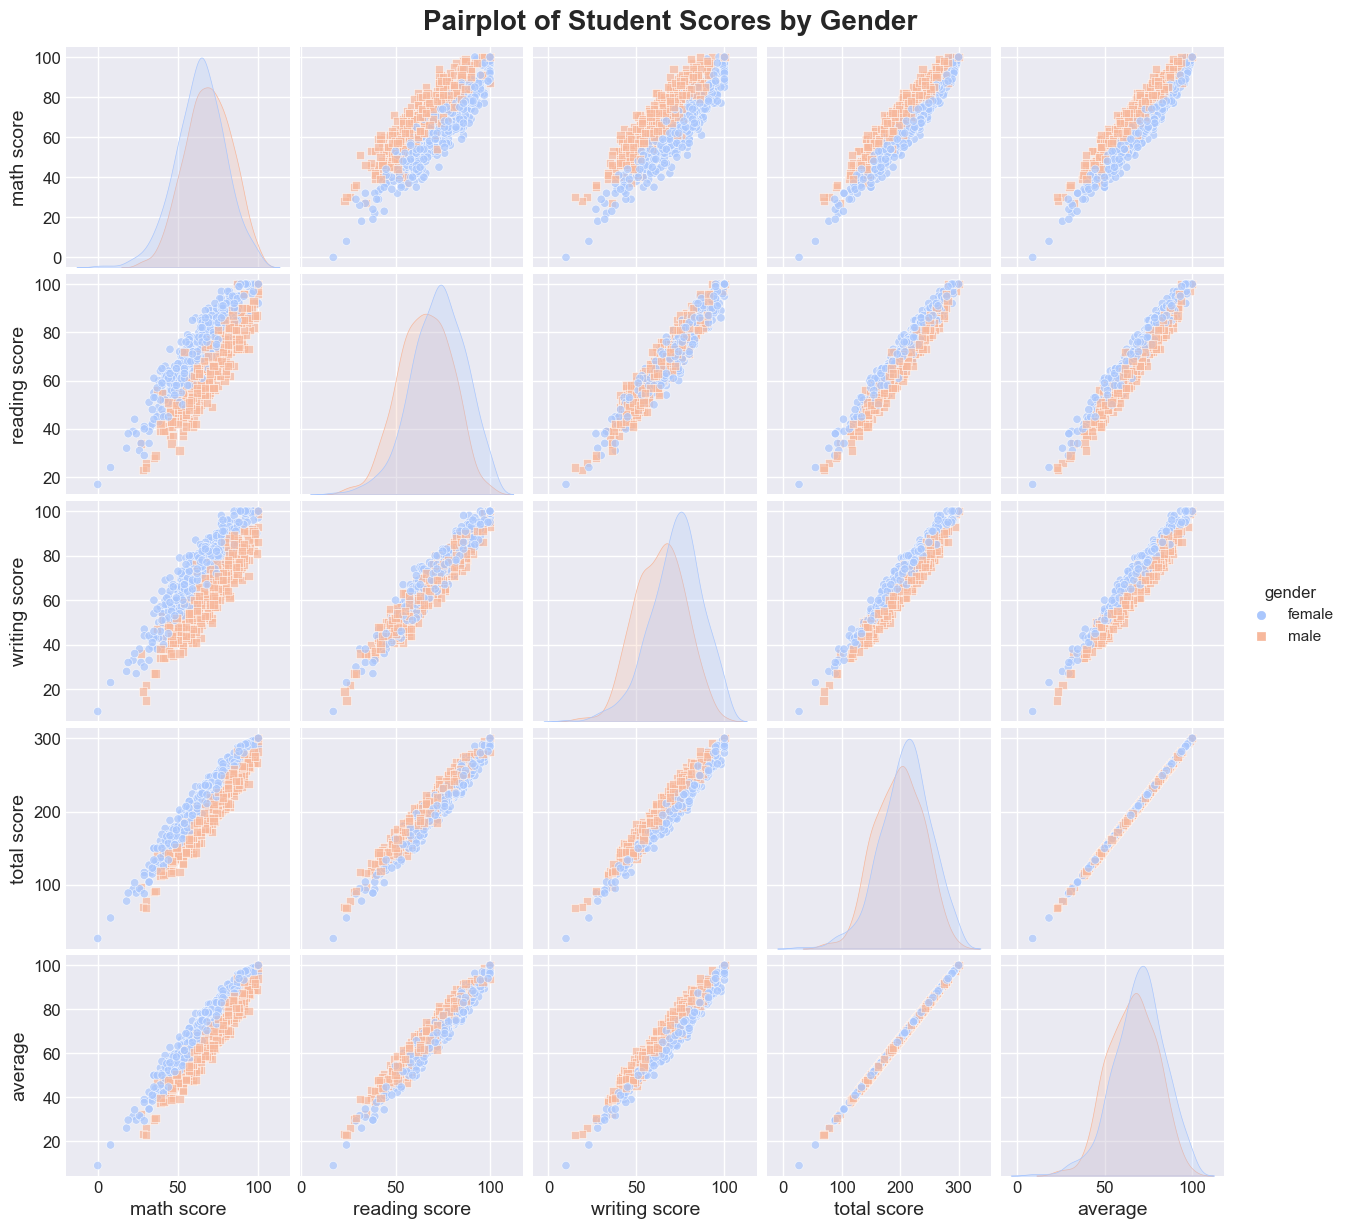

In [100]:
# Customize the appearance of the pair plot
pair_plot = sns.pairplot(df, hue='gender', palette='coolwarm', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha':0.7})

# Add titles and labels
pair_plot.fig.suptitle('Pairplot of Student Scores by Gender', fontsize=20, fontweight='bold')
pair_plot.fig.subplots_adjust(top=0.95)  # Adjust the top to fit the title

# Customize the appearance of each subplot
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

#### Insights from Pairplot Analysis

- **Linear Relationship Between Scores**: The pairplot reveals a clear linear relationship between the different academic scores (math, reading, and writing). This indicates that students who perform well in one subject are likely to perform well in others, suggesting a consistent level of overall academic ability.


### 5. Conclusions

- **Influence of Lunch, Race, and Parental Education**: Student performance is significantly influenced by factors such as the type of lunch received, racial/ethnic background, and parental level of education. These factors collectively impact academic outcomes.
- **Gender Differences in Performance**: Female students generally exhibit higher pass percentages and top scores compared to their male counterparts, indicating a trend of stronger overall performance among female students.
- **Impact of Test Preparation Courses**: Although the completion of test preparation courses does have a positive effect on student performance, it is not the most significant factor. However, finishing a test preparation course does provide some benefits in terms of improved scores.
- **Benefit of Completing Test Preparation Courses**: Students who complete test preparation courses tend to score higher, demonstrating the value of these courses in boosting academic performance.


In [105]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]